In [216]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [217]:
# Load data from Excel file
file_path = 'C:/Users/User/OneDrive/Έγγραφα/public_data/ΟΠΑ data final.xlsx'

# Load each sheet into separate DataFrames
receipts_df = pd.read_excel(file_path, sheet_name='Receipts')
visitors_df = pd.read_excel(file_path, sheet_name='Visitors')
schedule_df = pd.read_excel(file_path, sheet_name='Schedule')


# Standardize column names for consistency
receipts_df.columns = receipts_df.columns.str.lower()
visitors_df.columns = visitors_df.columns.str.lower()
schedule_df.columns = schedule_df.columns.str.lower()

# Display the first few rows of each DataFrame to inspect the data
print("Receipts Data:")
print(receipts_df.head())
print("\nVisitors Data:")
print(visitors_df.head())
print("\nSchedule Data:")
print(schedule_df.head())

Receipts Data:
   store  receipts  hour       date
0   6762        69    18 2024-03-09
1   8741        18    14 2024-02-26
2   8741        35    11 2024-04-30
3   6762        48    21 2024-01-05
4   7331        34    16 2024-04-13

Visitors Data:
   store       date  hour  visitors
0   7498 2024-02-11    20         0
1   7498 2024-04-09     8         0
2   7498 2024-09-02    22         0
3   7498 2024-10-21    21         0
4   7331 2024-07-25    15        33

Schedule Data:
        date     start       end  store  employee id
0 2024-01-03  09:00:00  17:00:00   7498         1001
1 2024-01-04  09:00:00  17:00:00   7498         1001
2 2024-01-05  13:00:00  21:00:00   7498         1001
3 2024-01-08  13:00:00  21:00:00   7498         1001
4 2024-01-09  13:00:00  21:00:00   7498         1001


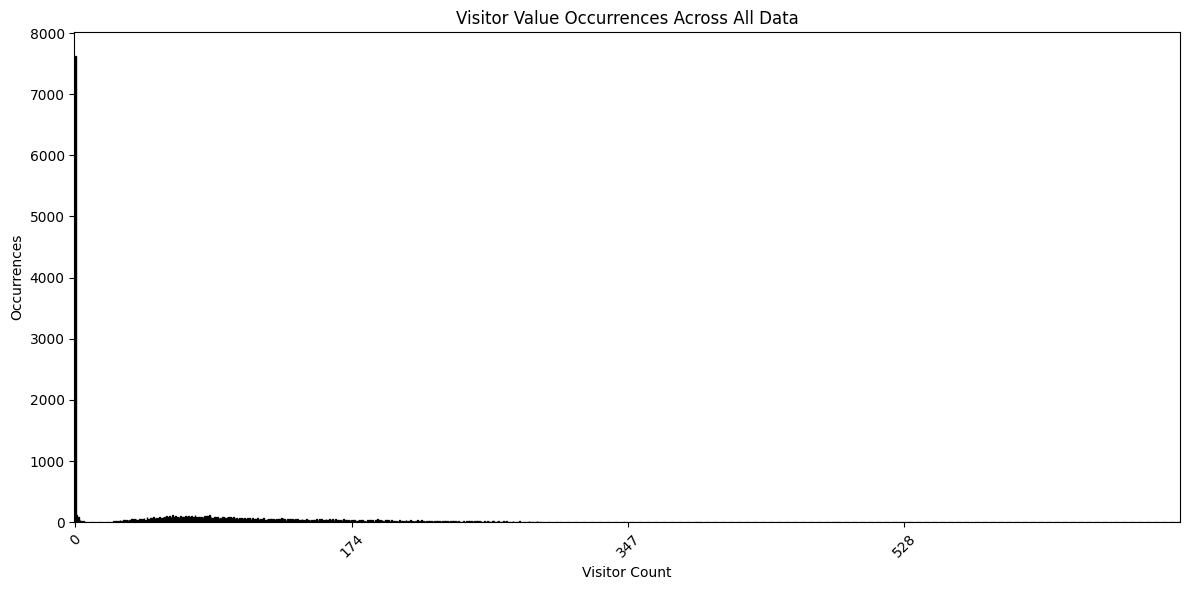

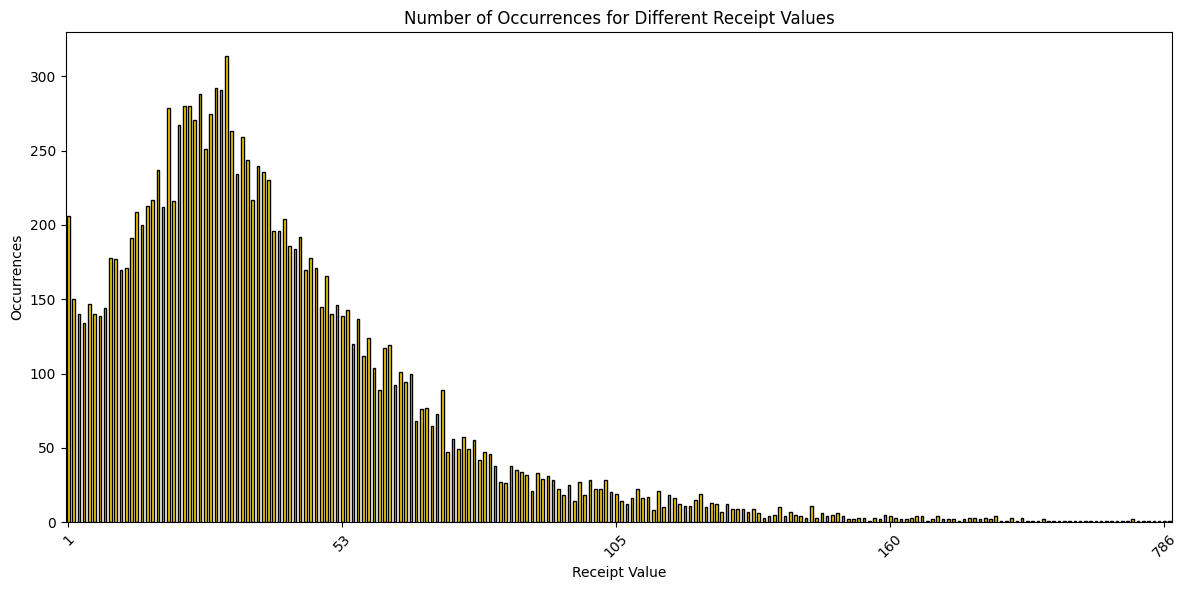

In [218]:
# Plot barcharts for overall dataset (Visitors and Receipts Values)
# Get visitor and receipt data directly from original DataFrames
visitor_value_counts = visitors_df['visitors'].value_counts().sort_index()
receipt_value_counts = receipts_df['receipts'].value_counts().sort_index()

# Plot visitor value occurrences
plt.figure(figsize=(12, 6))
visitor_value_counts.plot(kind='bar', color='#ADD8E6', edgecolor='black')  # Light blue color
plt.title('Visitor Value Occurrences Across All Data')
plt.xlabel('Visitor Count')
plt.ylabel('Occurrences')
plt.xticks(ticks=range(0, len(visitor_value_counts.index), max(1, len(visitor_value_counts.index)//4)),
           labels=visitor_value_counts.index[::max(1, len(visitor_value_counts.index)//4)], rotation=45)
plt.tight_layout()
plt.show()

# Plot receipt value occurrences (x-axis: receipt values, y-axis: occurrences)
plt.figure(figsize=(12, 6))
receipt_value_counts.plot(kind='bar', color='#FFD700', edgecolor='black')  # Gold color
plt.title('Number of Occurrences for Different Receipt Values')
plt.xlabel('Receipt Value')
plt.ylabel('Occurrences')
plt.xticks(ticks=range(0, len(receipt_value_counts.index), max(1, len(receipt_value_counts.index)//4)),
           labels=receipt_value_counts.index[::max(1, len(receipt_value_counts.index)//4)], rotation=45)
plt.tight_layout()
plt.show()



In [219]:
# Standardize column names for consistency
schedule_df.columns = schedule_df.columns.str.lower()

# Convert date columns to datetime format
schedule_df['date'] = pd.to_datetime(schedule_df['date'])
visitors_df['date'] = pd.to_datetime(visitors_df['date'])

# Combine date and time columns to create full datetime objects
schedule_df['start_datetime'] = pd.to_datetime(schedule_df['date'].astype(str) + ' ' + schedule_df['start'].astype(str))
schedule_df['end_datetime'] = pd.to_datetime(schedule_df['date'].astype(str) + ' ' + schedule_df['end'].astype(str))

# Calculate the duration of each shift in hours
schedule_df['shift_duration'] = (schedule_df['end_datetime'] - schedule_df['start_datetime']).dt.total_seconds() / 3600

print(schedule_df)


            date     start       end  store  employee id      start_datetime  \
0     2024-01-03  09:00:00  17:00:00   7498         1001 2024-01-03 09:00:00   
1     2024-01-04  09:00:00  17:00:00   7498         1001 2024-01-04 09:00:00   
2     2024-01-05  13:00:00  21:00:00   7498         1001 2024-01-05 13:00:00   
3     2024-01-08  13:00:00  21:00:00   7498         1001 2024-01-08 13:00:00   
4     2024-01-09  13:00:00  21:00:00   7498         1001 2024-01-09 13:00:00   
...          ...       ...       ...    ...          ...                 ...   
22702 2024-11-25  15:00:00  21:00:00   7331   3479533848 2024-11-25 15:00:00   
22703 2024-11-26  09:00:00  15:00:00   7331   3479533848 2024-11-26 09:00:00   
22704 2024-11-27  15:00:00  21:00:00   7331   3479533848 2024-11-27 15:00:00   
22705 2024-11-28  15:00:00  21:00:00   7331   3479533848 2024-11-28 15:00:00   
22706 2024-11-29  09:00:00  15:00:00   7331   3479533848 2024-11-29 09:00:00   

             end_datetime  shift_durati

In [220]:
# Count unique employees
unique_employees = schedule_df['employee id'].nunique()
print(f"\nUnique Employees: {unique_employees}")



Unique Employees: 246


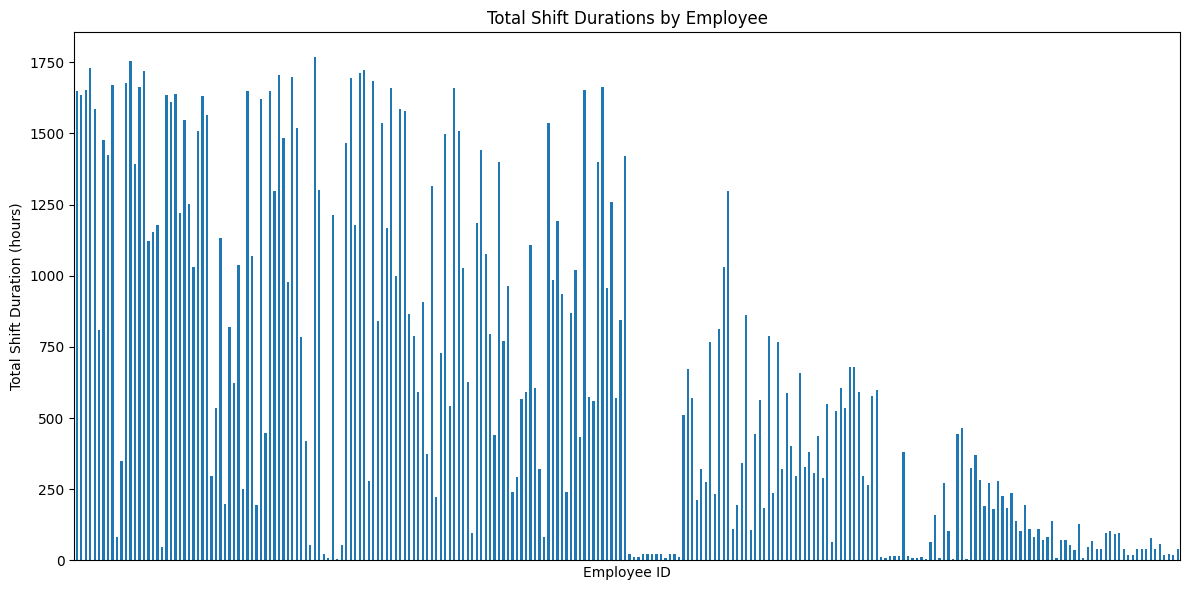

In [221]:
# Plot the shift durations for each employee on a bar chart
shift_durations_by_employee = schedule_df.groupby('employee id')['shift_duration'].sum()
plt.figure(figsize=(12, 6))
shift_durations_by_employee.plot(kind='bar', title='Total Shift Durations by Employee')
plt.xlabel('Employee ID')
plt.ylabel('Total Shift Duration (hours)')
plt.xticks([])  # Remove employee IDs from x-axis for better optimization
plt.tight_layout()
plt.show()



In [222]:
# Count the range of each value in the table
print("\nRange of values for each column:")
for column in schedule_df.columns:
    if schedule_df[column].dtype in ['int64', 'float64', 'datetime64[ns]']:
        col_min = schedule_df[column].min()
        col_max = schedule_df[column].max()
        print(f"{column}: min = {col_min}, max = {col_max}")
    else:
        unique_values = schedule_df[column].nunique()
        print(f"{column}: {unique_values} unique values")



Range of values for each column:
date: min = 2024-01-03 00:00:00, max = 2024-11-30 00:00:00
start: 63 unique values
end: 55 unique values
store: min = 6762, max = 8741
employee id: min = 1001, max = 3497960151
start_datetime: min = 2024-01-03 07:00:00, max = 2024-11-30 16:30:00
end_datetime: min = 2024-01-03 13:00:00, max = 2024-11-30 21:00:00
shift_duration: min = 3.0, max = 12.0



Number of Employees by Store:
store
6762    61
7331    41
7498    81
8741    63
Name: employee id, dtype: int64


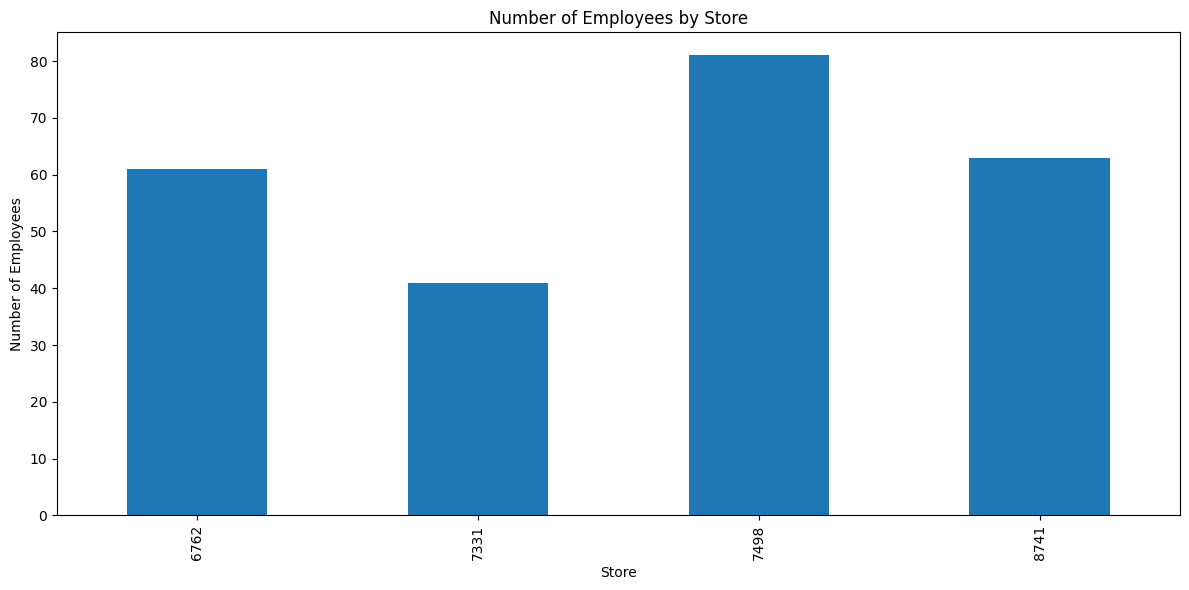

In [223]:
# Count how many employees are by store
employees_by_store = schedule_df.groupby('store')['employee id'].nunique()
print("\nNumber of Employees by Store:")
print(employees_by_store)

# Plot the number of employees by store on a bar chart
plt.figure(figsize=(12, 6))
employees_by_store.plot(kind='bar', title='Number of Employees by Store')
plt.xlabel('Store')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()



Shift Type Counts:
shift_type
Full-Time    12771
Part-Time     9401
Overtime       535
Name: count, dtype: int64


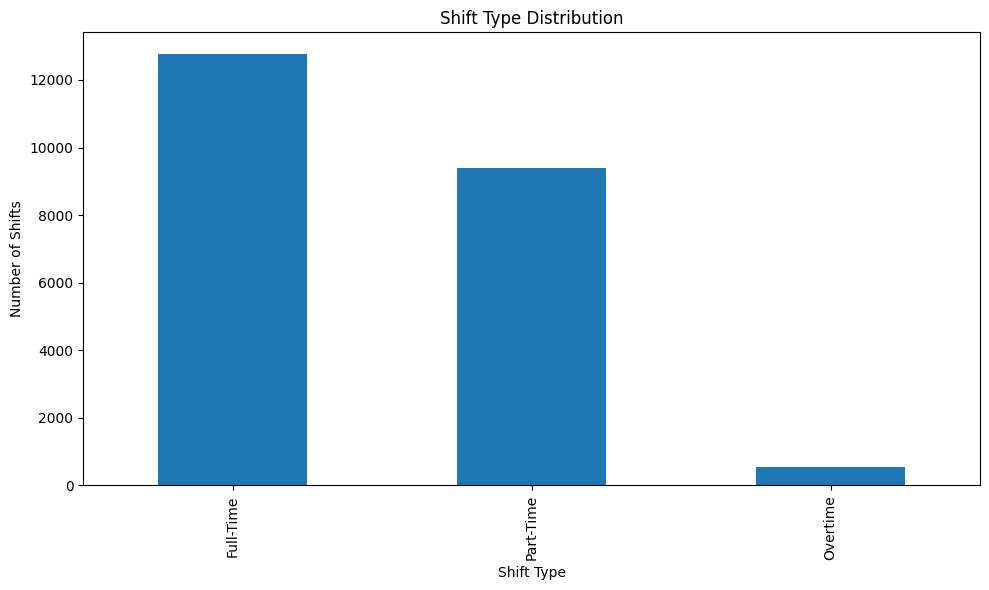

In [224]:
# Classify shifts as part-time, full-time, or overtime
schedule_df['shift_type'] = pd.cut(
    schedule_df['shift_duration'],
    bins=[0, 6, 8, float('inf')],
    labels=['Part-Time', 'Full-Time', 'Overtime'],
    right=True
)

# Count the number of shifts in each category
shift_counts = schedule_df['shift_type'].value_counts()
print("\nShift Type Counts:")
print(shift_counts)

# Plot the counts of each shift type on a bar chart
plt.figure(figsize=(10, 6))
shift_counts.plot(kind='bar', title='Shift Type Distribution')
plt.xlabel('Shift Type')
plt.ylabel('Number of Shifts')
plt.tight_layout()
plt.show()



Shift Type Counts by Store:
shift_type  Part-Time  Full-Time  Overtime
store                                     
6762             2507       3255       278
7331             2026       2028        96
7498             3195       4981       136
8741             1673       2507        25


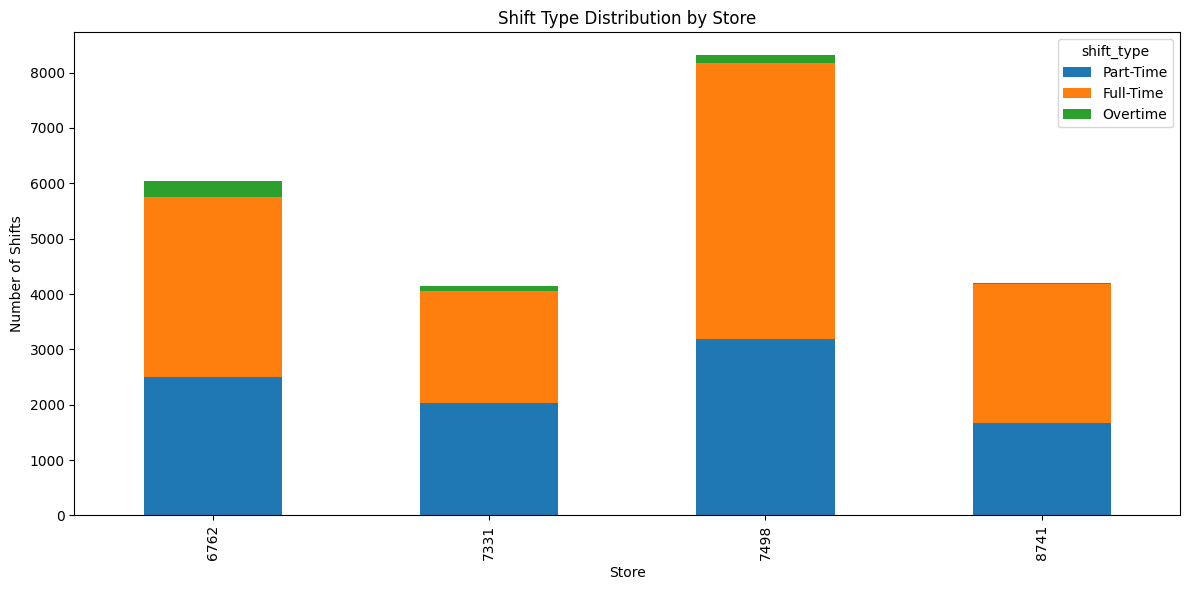

In [225]:
# Classify shifts as part-time, full-time, or overtime
schedule_df['shift_type'] = pd.cut(
    schedule_df['shift_duration'],
    bins=[0, 6, 8, float('inf')],
    labels=['Part-Time', 'Full-Time', 'Overtime'],
    right=True
)

# Count the number of shifts in each category for each store
shift_counts_by_store = schedule_df.groupby('store')['shift_type'].value_counts().unstack()
print("\nShift Type Counts by Store:")
print(shift_counts_by_store)

# Plot the counts of each shift type for each store on a bar chart
shift_counts_by_store.plot(kind='bar', stacked=True, figsize=(12, 6), title='Shift Type Distribution by Store')
plt.xlabel('Store')
plt.ylabel('Number of Shifts')
plt.tight_layout()
plt.show()


In [226]:
# Calculate total work hours and shift counts for each employee
total_work_hours = schedule_df.groupby('employee id')['shift_duration'].sum()
shift_counts_by_type = schedule_df.groupby(['employee id', 'shift_type']).size().unstack(fill_value=0)

# Combine total work hours and shift counts into a single DataFrame
employee_summary = pd.concat([total_work_hours, shift_counts_by_type], axis=1)
employee_summary.rename(columns={'shift_duration': 'total_work_hours'}, inplace=True)

# Get the top 3 employees by total work hours
top_employees = employee_summary.sort_values(by='total_work_hours', ascending=False).head(3)

# Display the top 3 employees
print("\nTop 3 Employees by Total Work Hours:")
print(top_employees)


Top 3 Employees by Total Work Hours:
             total_work_hours  Part-Time  Full-Time  Overtime
employee id                                                  
3479534342             1767.0          0        187        28
16478                  1756.0          1        184        28
10549                  1730.0          4        202        10


C:\Users\User\AppData\Local\Temp\ipykernel_17508\4042416043.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shift_counts_by_type = schedule_df.groupby(['employee id', 'shift_type']).size().unstack(fill_value=0)


In [227]:
# Count the number of employees with 4, 5, 6, and more than 6 digits in their IDs
schedule_df['employee_id_length'] = schedule_df['employee id'].astype(str).str.len()

#count_less_digits = (schedule_df['employee_id_length'] <4 ).sum()
count_4_digits = (schedule_df['employee_id_length'] == 4).sum()
count_5_digits = (schedule_df['employee_id_length'] == 5).sum()
count_9_digits = (schedule_df['employee_id_length'] == 9).sum()
count_10_digits = (schedule_df['employee_id_length'] == 10).sum()

# Display the counts
#print(f"\nNumber of employees with less that 4-digit IDs: {count_less_digits}")
print(f"Number of employees with 4-digit IDs: {count_4_digits}")
print(f"Number of employees with 5-digit IDs: {count_5_digits}")
print(f"Number of employees with 9-digit IDs: {count_9_digits}")
print(f"Number of employees with more than 6-digit IDs: {count_10_digits}")


Number of employees with 4-digit IDs: 614
Number of employees with 5-digit IDs: 1741
Number of employees with 9-digit IDs: 2614
Number of employees with more than 6-digit IDs: 17738


In [233]:

# Calculate the range of total work hours for each category of employee ID length --> den uparxei diaforopoiisi stis ores poy douleoun
total_hours_by_length = schedule_df.groupby('employee_id_length')['shift_duration'].sum()
min_hours_by_length = schedule_df.groupby('employee_id_length')['shift_duration'].min()
max_hours_by_length = schedule_df.groupby('employee_id_length')['shift_duration'].max()
avg_hours_by_length = schedule_df.groupby('employee_id_length')['shift_duration'].mean()
print("\nTotal, Minimum, and Maximum Hours by Employee ID Length:")
for length, total in total_hours_by_length.items():
    min_hours = min_hours_by_length[length]
    max_hours = max_hours_by_length[length]
    avg_hours = avg_hours_by_length[length]
    print(f"Employee ID Length {length}: Total = {total:.2f}, Min = {min_hours:.2f}, Max = {max_hours:.2f}, Avg = {avg_hours:.2f}")



Total, Minimum, and Maximum Hours by Employee ID Length:
Employee ID Length 4: Total = 4937.00, Min = 5.00, Max = 11.00, Avg = 8.04
Employee ID Length 5: Total = 13951.00, Min = 4.00, Max = 11.00, Avg = 8.01
Employee ID Length 9: Total = 19961.50, Min = 4.00, Max = 12.00, Avg = 7.64
Employee ID Length 10: Total = 117864.50, Min = 3.00, Max = 12.00, Avg = 6.64


In [119]:
# Check if all employees of each ID length category work in the same store
unique_stores_by_length = schedule_df.groupby('employee_id_length')['store'].nunique()

print("\nUnique Stores by Employee ID Length:")
for length, unique_stores in unique_stores_by_length.items():
    print(f"Employee ID Length {length}: {unique_stores} unique stores")

# Display the specific stores for each employee ID length category
stores_by_length = schedule_df.groupby('employee_id_length')['store'].unique()
print("\nStores by Employee ID Length:")
for length, stores in stores_by_length.items():
    print(f"Employee ID Length {length}: {list(stores)}")

# Identify categories where all employees work in the same store
same_store_categories = unique_stores_by_length[unique_stores_by_length == 1].index.tolist()
print(f"\nEmployee ID Length categories where all employees work in the same store: {same_store_categories}")



Unique Stores by Employee ID Length:
Employee ID Length 4: 2 unique stores
Employee ID Length 5: 2 unique stores
Employee ID Length 9: 4 unique stores
Employee ID Length 10: 4 unique stores

Stores by Employee ID Length:
Employee ID Length 4: [7498, 6762]
Employee ID Length 5: [6762, 7498]
Employee ID Length 9: [7498, 7331, 6762, 8741]
Employee ID Length 10: [7498, 7331, 8741, 6762]

Employee ID Length categories where all employees work in the same store: []


In [120]:
#kapoia katigoria kanei part time h full? allios poia difference
#posoi upalloiloi douleuoun ana ora ana katastima --> to xo
#posous diaforetikous upallilous apasxolei kathe katastima --> to xo
#posoi upalloiloi douleoun se 1 2 3 4 magazia --> oloi se ena --> to xo
# uparxoun upalloiloi pou den doulepsan tous teleutaious mhnes 
#epoxiakoi ypalloiloi --> pote?

In [121]:
# Count how many employees work in 1 store, 2 stores, 3 stores, and 4 stores
employee_store_counts = schedule_df.groupby('employee id')['store'].nunique().value_counts()
print("\nNumber of Employees by Store Count:")
for stores, count in employee_store_counts.items():
    print(f"{count} employees work in {stores} store(s)")

#kathe emplpoy exei mono ena store komple!


Number of Employees by Store Count:
246 employees work in 1 store(s)


C:\Users\User\AppData\Local\Temp\ipykernel_17508\1239709370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_7331_df['month'] = store_7331_df['date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_17508\1239709370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_7331_df['hour'] = store_7331_df['start_datetime'].dt.hour


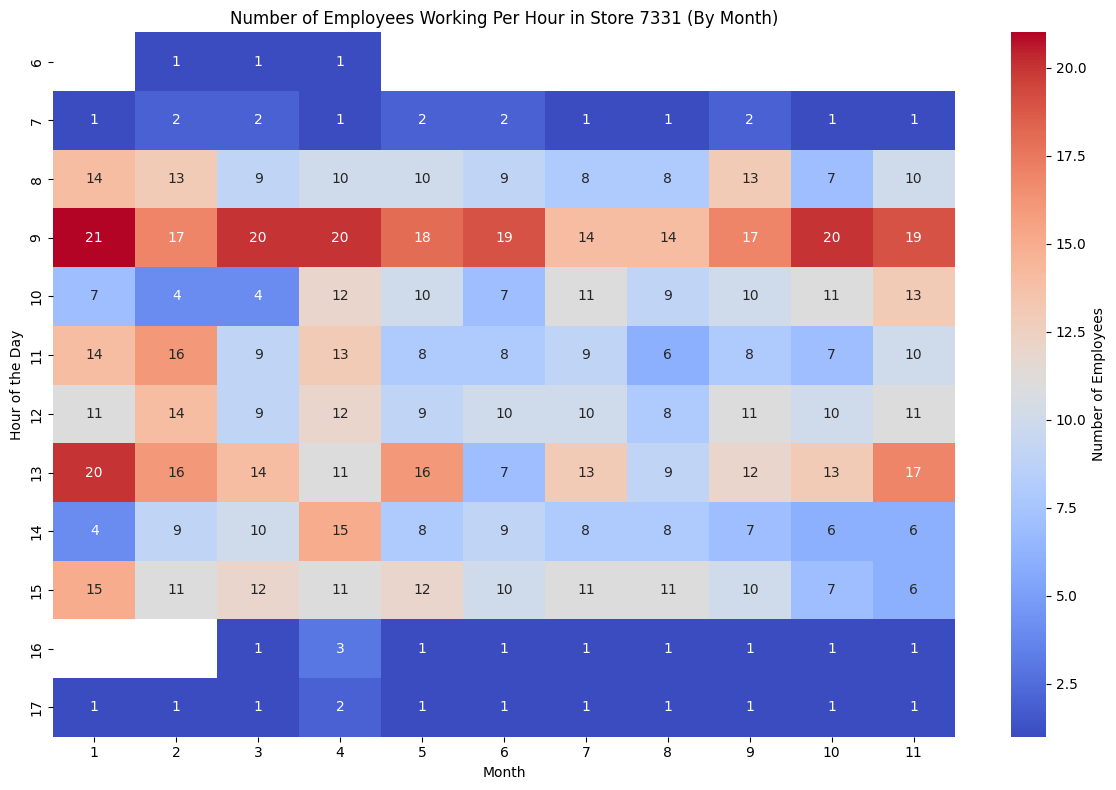

In [122]:
# Filter data for store 7331 --> small store athens -->lathos metraei mono clock in
store_7331_df = schedule_df[schedule_df['store'] == 7331]

# Extract month and hour information
store_7331_df['month'] = store_7331_df['date'].dt.month
store_7331_df['hour'] = store_7331_df['start_datetime'].dt.hour

# Count the number of employees working per hour for each month
hourly_counts = store_7331_df.groupby(['month', 'hour'])['employee id'].nunique().reset_index()
hourly_counts.rename(columns={'employee id': 'employee_count'}, inplace=True)

# Create a pivot table for visualization
hourly_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count')

# Plot the schedule visualization
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='coolwarm', cbar_kws={'label': 'Number of Employees'})
plt.title('Number of Employees Working Per Hour in Store 7331 (By Month)')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

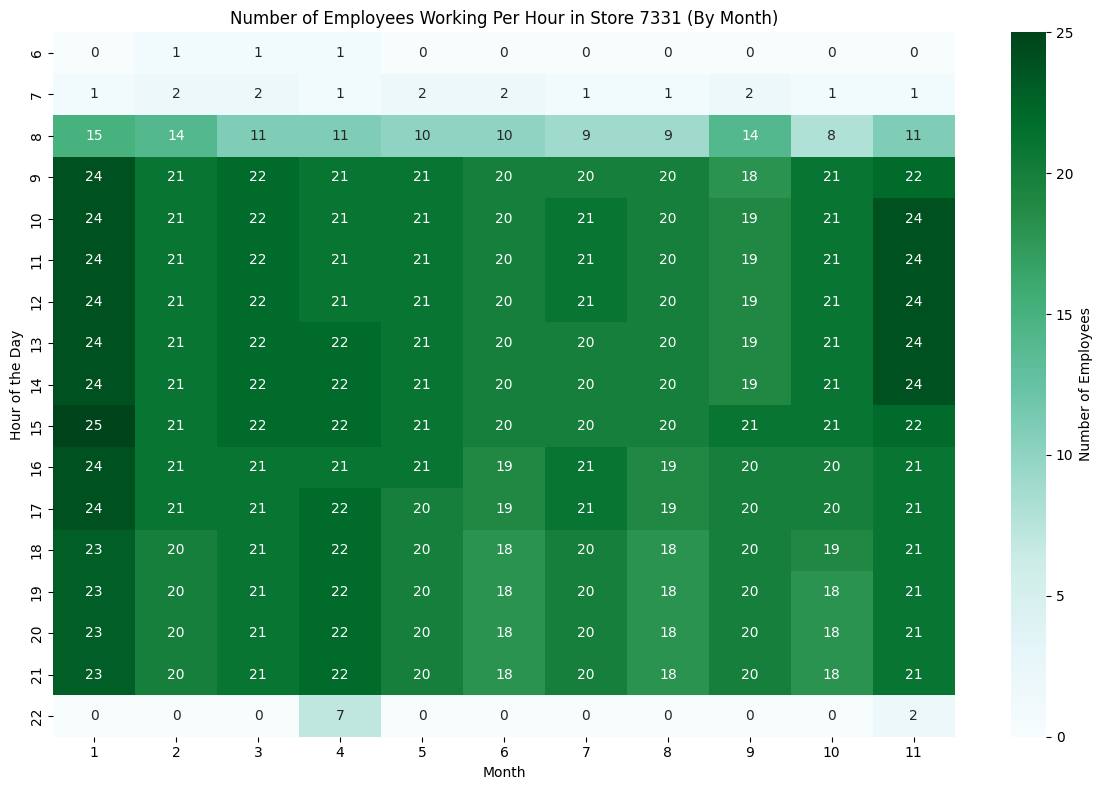


Preview of expanded_df:
    month  hour  employee_id
0       1    10    140025263
1       1    11    140025263
2       1    12    140025263
3       1    13    140025263
4       1    14    140025263
5       1    15    140025263
6       1    16    140025263
7       1    17    140025263
8       1    18    140025263
9       1    19    140025263
10      1    20    140025263
11      1    21    140025263
12      1    10    140025263
13      1    11    140025263
14      1    12    140025263
15      1    13    140025263
16      1    14    140025263
17      1    15    140025263
18      1    16    140025263
19      1    17    140025263


In [123]:
# Filter data for store 7331 -->sosto metraei duration of shift
store_7331_df = schedule_df[schedule_df['store'] == 7331]

# Expand the range of hours covered by each employee's shift
expanded_hours = []
for _, row in store_7331_df.iterrows():
    for hour in range(row['start_datetime'].hour, row['end_datetime'].hour + 1):
        expanded_hours.append({'month': row['date'].month, 'hour': hour, 'employee_id': row['employee id']})

# Create a DataFrame for expanded hours
expanded_df = pd.DataFrame(expanded_hours)

# Count the number of employees working per hour for each month
hourly_counts = expanded_df.groupby(['month', 'hour'])['employee_id'].nunique().reset_index()
hourly_counts.rename(columns={'employee_id': 'employee_count'}, inplace=True)

# Create a pivot table for visualization
hourly_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count').fillna(0)

# Plot the schedule visualization
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'})
plt.title('Number of Employees Working Per Hour in Store 7331 (By Month)')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

# Print a preview of expanded_df
print("\nPreview of expanded_df:")
print(expanded_df.head(20))


C:\Users\User\AppData\Local\Temp\ipykernel_17508\2072674693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_visitors['month'] = store_visitors['date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_17508\2072674693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_visitors['hour'] = store_visitors['hour']


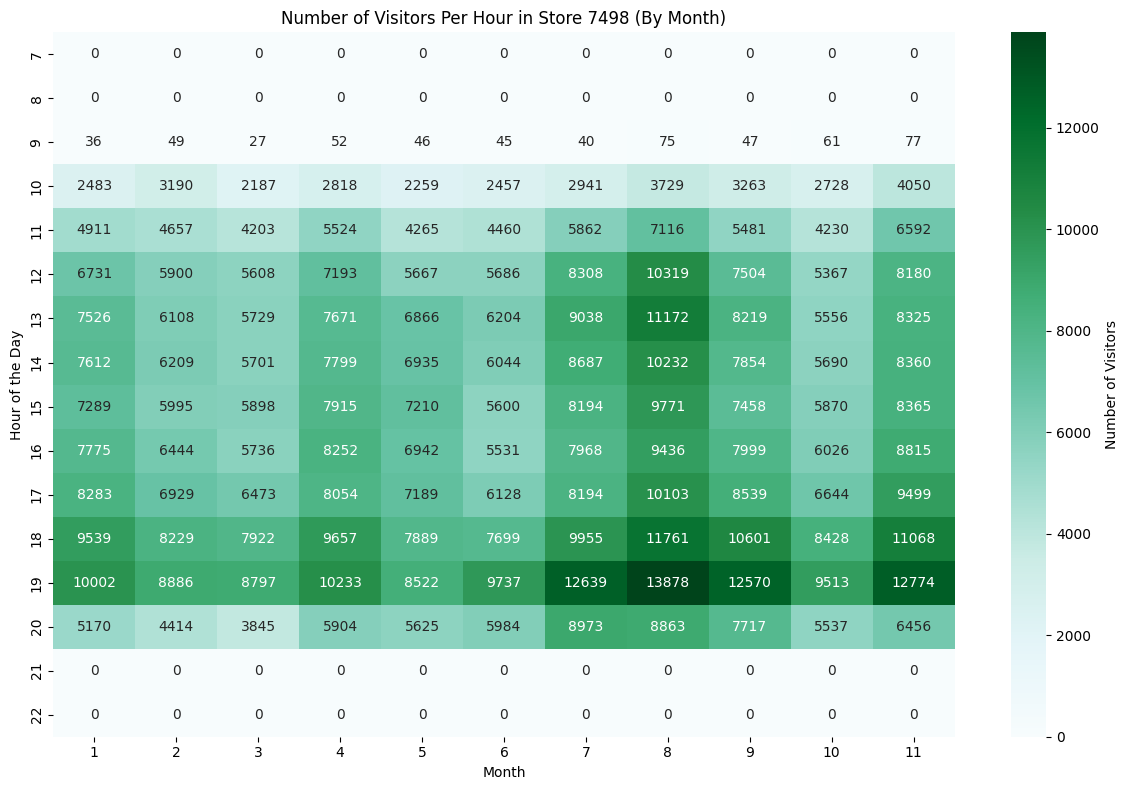

C:\Users\User\AppData\Local\Temp\ipykernel_17508\2072674693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_visitors['month'] = store_visitors['date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_17508\2072674693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_visitors['hour'] = store_visitors['hour']


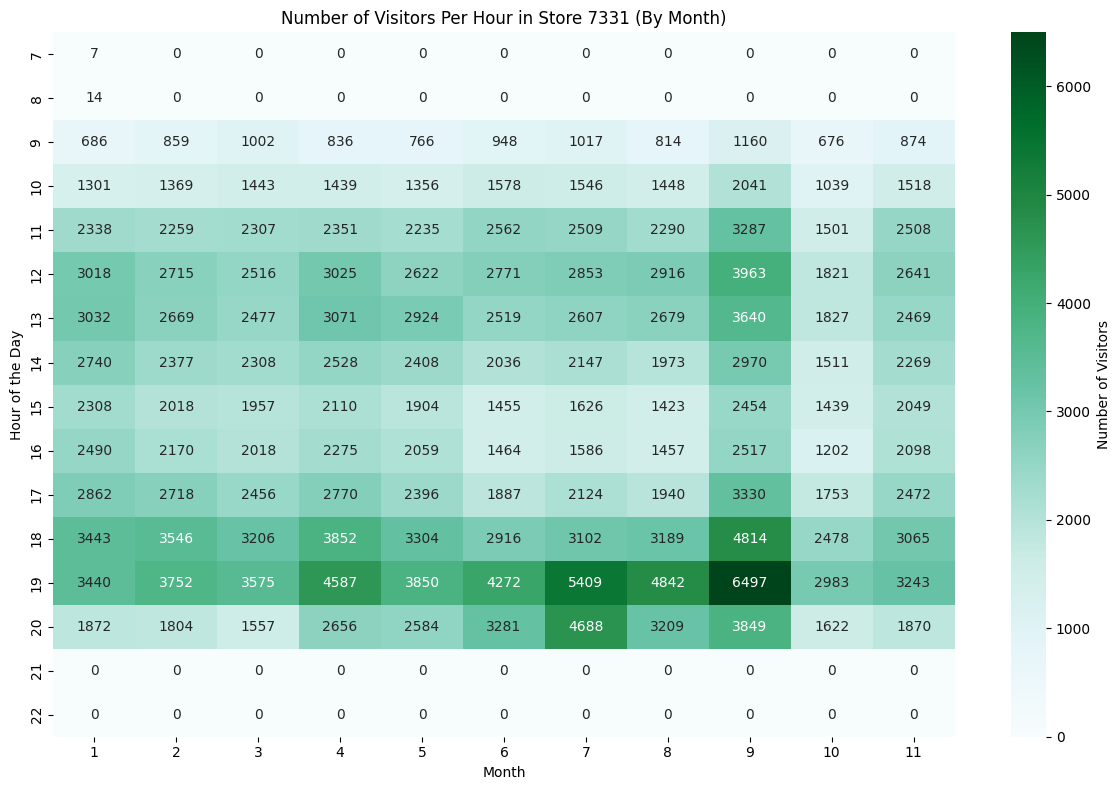

C:\Users\User\AppData\Local\Temp\ipykernel_17508\2072674693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_visitors['month'] = store_visitors['date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_17508\2072674693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_visitors['hour'] = store_visitors['hour']


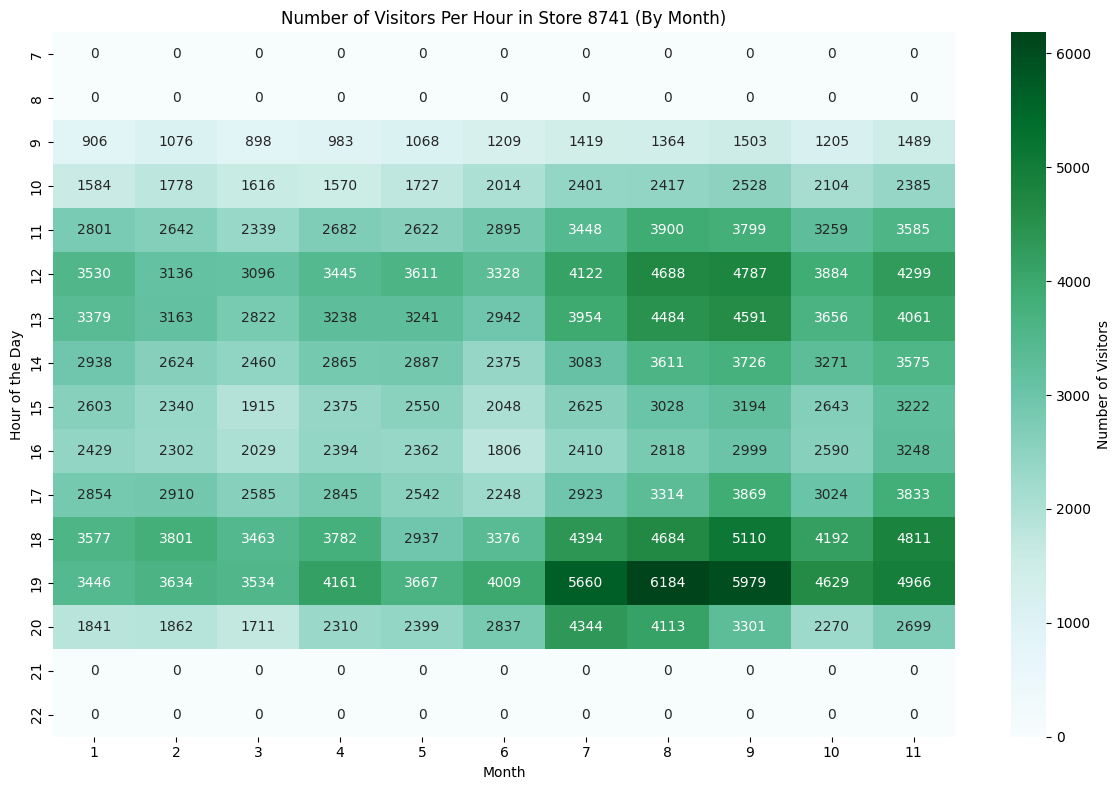

C:\Users\User\AppData\Local\Temp\ipykernel_17508\2072674693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_visitors['month'] = store_visitors['date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_17508\2072674693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_visitors['hour'] = store_visitors['hour']


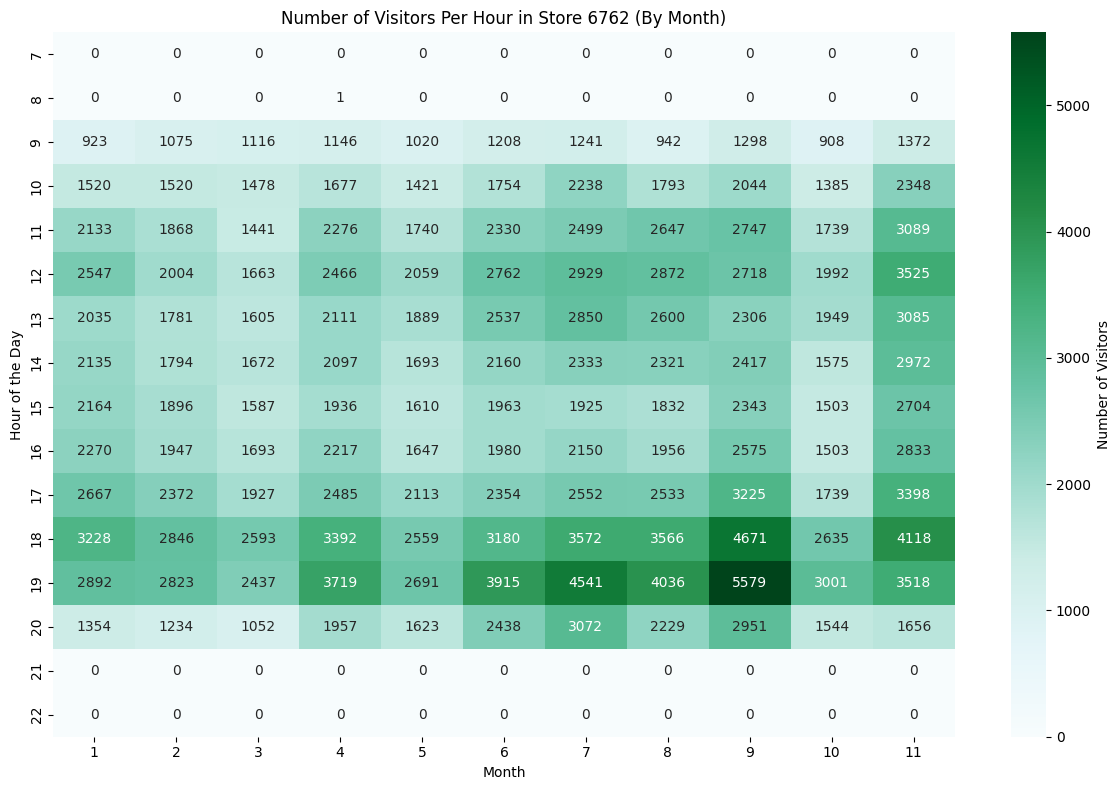

In [ ]:
# List of store IDs to create heatmaps for
store_ids = visitors_df['store'].unique()

# Generate a heatmap for each store
for store_id in store_ids:
    # Filter data for the current store
    store_visitors = visitors_df[visitors_df['store'] == store_id]

    # Extract month and hour information
    store_visitors['month'] = store_visitors['date'].dt.month
    store_visitors['hour'] = store_visitors['hour']

    # Group by month and hour to calculate the count of visitors
    hourly_visitor_counts = store_visitors.groupby(['month', 'hour'])['visitors'].sum().reset_index()
    hourly_visitor_counts.rename(columns={'visitors': 'visitor_count'}, inplace=True)

    # Create a pivot table for visualization
    visitor_pivot = hourly_visitor_counts.pivot(index='hour', columns='month', values='visitor_count').fillna(0)

    # Plot the heatmap for the current store
    plt.figure(figsize=(12, 8))
    sns.heatmap(visitor_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Visitors'})
    plt.title(f'Number of Visitors Per Hour in Store {store_id} (By Month)')
    plt.xlabel('Month')
    plt.ylabel('Hour of the Day')
    plt.tight_layout()
    plt.show()

#paratiriseis
##pos mpikan 14 tin ora 8 pou den eimai anoixta sto 7331


C:\Users\User\AppData\Local\Temp\ipykernel_17508\2731786728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_6762_df['month'] = store_6762_df['date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_17508\2731786728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_6762_df['hour'] = store_6762_df['start_datetime'].dt.hour


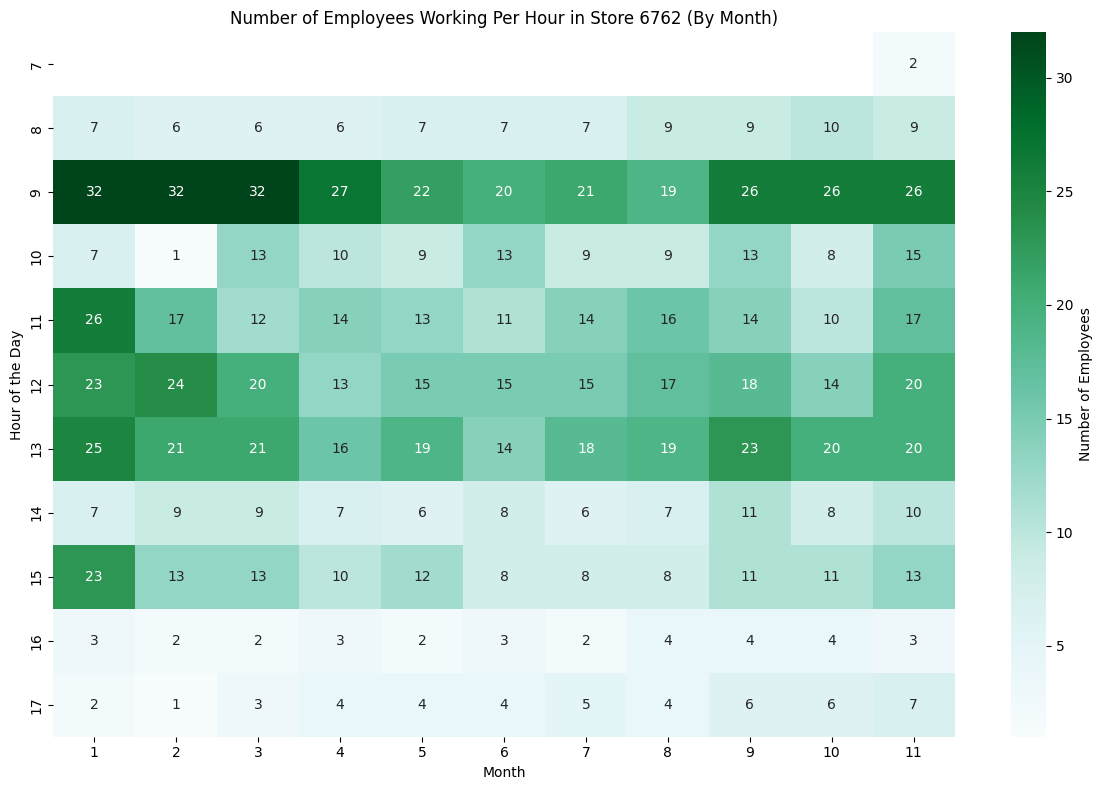

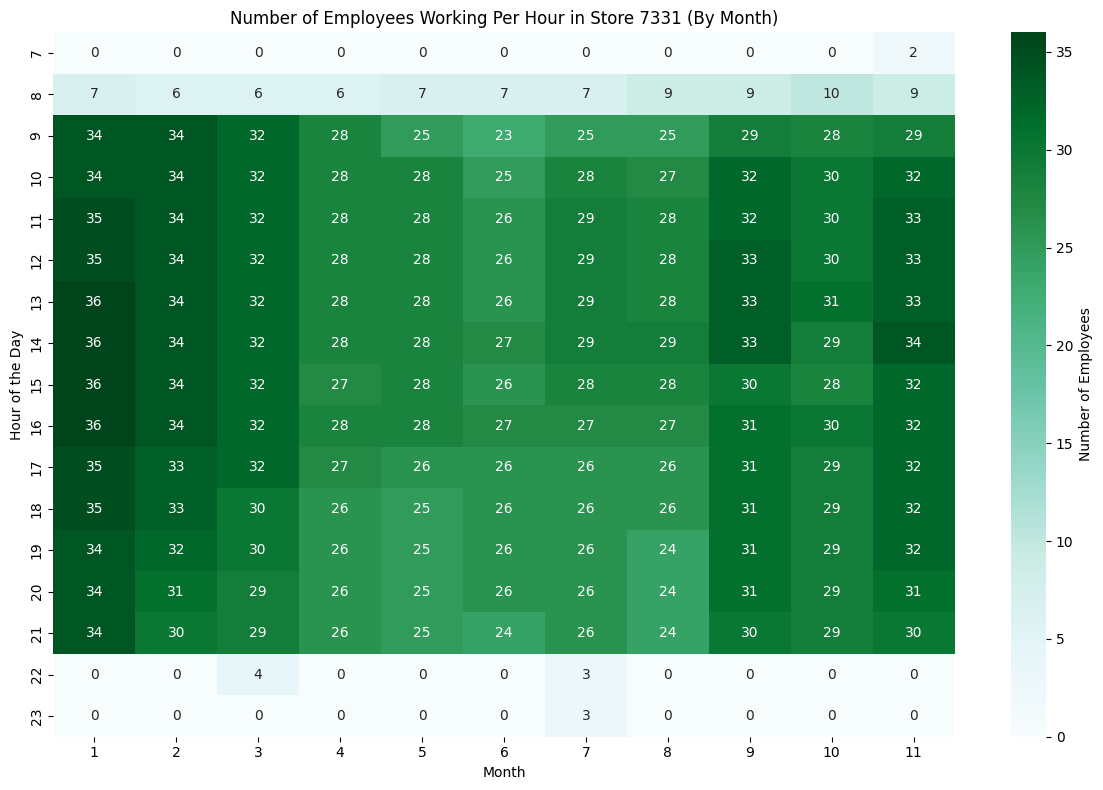

In [ ]:
# Filter data for store 6762 --> p +h
store_6762_df = schedule_df[schedule_df['store'] == 6762]

# Extract month and hour information
store_6762_df['month'] = store_6762_df['date'].dt.month
store_6762_df['hour'] = store_6762_df['start_datetime'].dt.hour

# Count the number of employees working per hour for each month
hourly_counts = store_6762_df.groupby(['month', 'hour'])['employee id'].nunique().reset_index()
hourly_counts.rename(columns={'employee id': 'employee_count'}, inplace=True)

# Create a pivot table for visualization
hourly_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count')

# Plot the schedule visualization
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'})
plt.title('Number of Employees Working Per Hour in Store 6762 (By Month)')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

store_6762_df = schedule_df[schedule_df['store'] == 6762]

# Expand the range of hours covered by each employee's shift
expanded_hours = []
for _, row in store_6762_df.iterrows():
    for hour in range(row['start_datetime'].hour, row['end_datetime'].hour + 1):
        expanded_hours.append({'month': row['date'].month, 'hour': hour, 'employee_id': row['employee id']})

# Create a DataFrame for expanded hours
expanded_df = pd.DataFrame(expanded_hours)

# Count the number of employees working per hour for each month
hourly_counts = expanded_df.groupby(['month', 'hour'])['employee_id'].nunique().reset_index()
hourly_counts.rename(columns={'employee_id': 'employee_count'}, inplace=True)

# Create a pivot table for visualization
hourly_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count').fillna(0)

# Plot the schedule visualization
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'})
plt.title('Number of Employees Working Per Hour in Store 7331 (By Month)')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

In [126]:
print(hourly_pivot.head())

month    1     2     3     4     5     6     7     8     9     10    11
hour                                                                   
7       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0
8       7.0   6.0   6.0   6.0   7.0   7.0   7.0   9.0   9.0  10.0   9.0
9      34.0  34.0  32.0  28.0  25.0  23.0  25.0  25.0  29.0  28.0  29.0
10     34.0  34.0  32.0  28.0  28.0  25.0  28.0  27.0  32.0  30.0  32.0
11     35.0  34.0  32.0  28.0  28.0  26.0  29.0  28.0  32.0  30.0  33.0


C:\Users\User\AppData\Local\Temp\ipykernel_17508\1062787123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_7498_df['month'] = store_7498_df['date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_17508\1062787123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_7498_df['hour'] = store_7498_df['start_datetime'].dt.hour


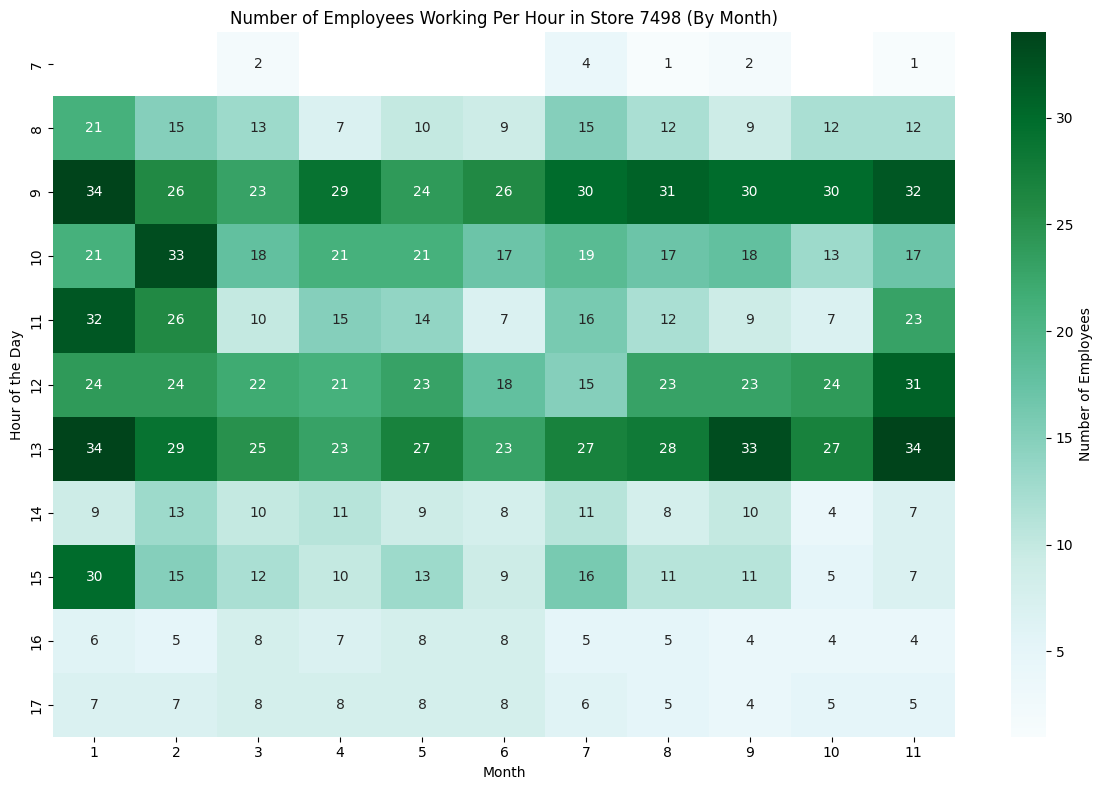

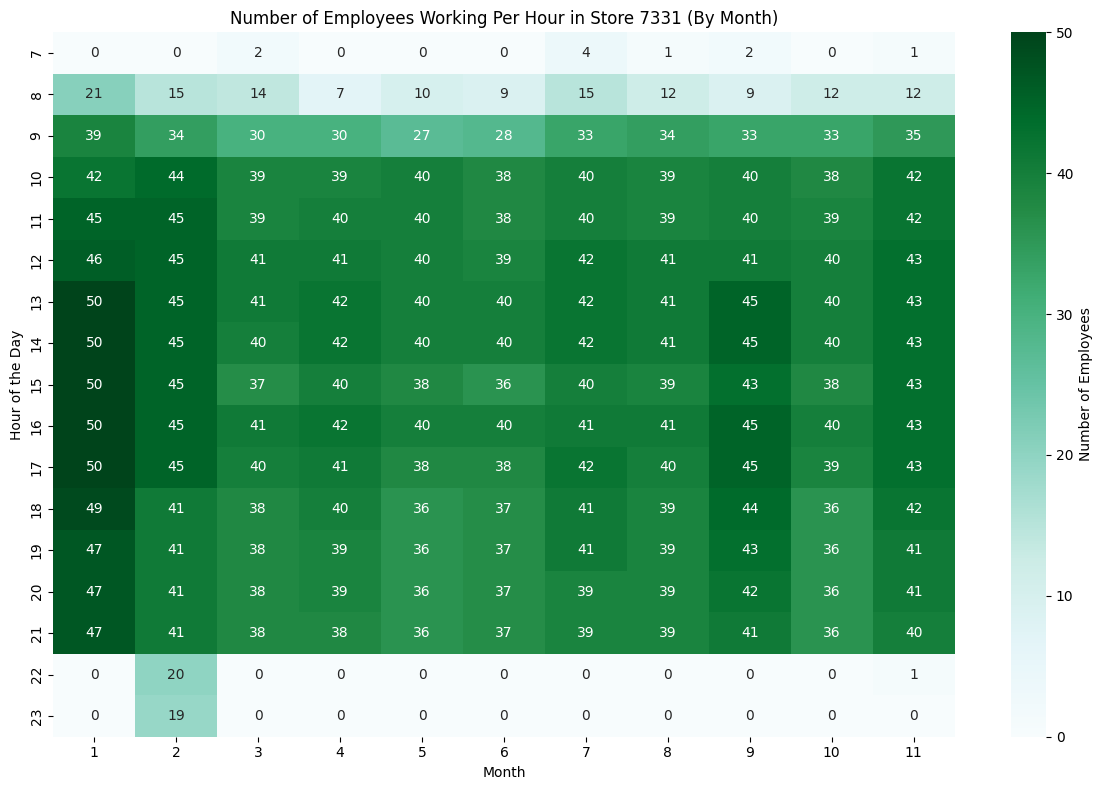

In [ ]:
# Filter data for store 7498 -->pdl mall
store_7498_df = schedule_df[schedule_df['store'] == 7498]

# Extract month and hour information
store_7498_df['month'] = store_7498_df['date'].dt.month
store_7498_df['hour'] = store_7498_df['start_datetime'].dt.hour

# Count the number of employees working per hour for each month
hourly_counts = store_7498_df.groupby(['month', 'hour'])['employee id'].nunique().reset_index()
hourly_counts.rename(columns={'employee id': 'employee_count'}, inplace=True)

# Create a pivot table for visualization
hourly_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count')

# Plot the schedule visualization
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'})
plt.title('Number of Employees Working Per Hour in Store 7498 (By Month)')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

#whole duration of shift
#store_7498_df = schedule_df[schedule_df['store'] == 7498]
# Expand the range of hours covered by each employee's shift
expanded_hours = []
for _, row in store_7498_df.iterrows():
    for hour in range(row['start_datetime'].hour, row['end_datetime'].hour + 1):
        expanded_hours.append({'month': row['date'].month, 'hour': hour, 'employee_id': row['employee id']})

# Create a DataFrame for expanded hours
expanded_df = pd.DataFrame(expanded_hours)

# Count the number of employees working per hour for each month
hourly_counts = expanded_df.groupby(['month', 'hour'])['employee_id'].nunique().reset_index()
hourly_counts.rename(columns={'employee_id': 'employee_count'}, inplace=True)

# Create a pivot table for visualization
hourly_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count').fillna(0)

# Plot the schedule visualization
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'})
plt.title('Number of Employees Working Per Hour in Store 7331 (By Month)')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17508\4123588361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_8741_df['month'] = store_8741_df['date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_17508\4123588361.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_8741_df['hour'] = store_8741_df['start_datetime'].dt.hour


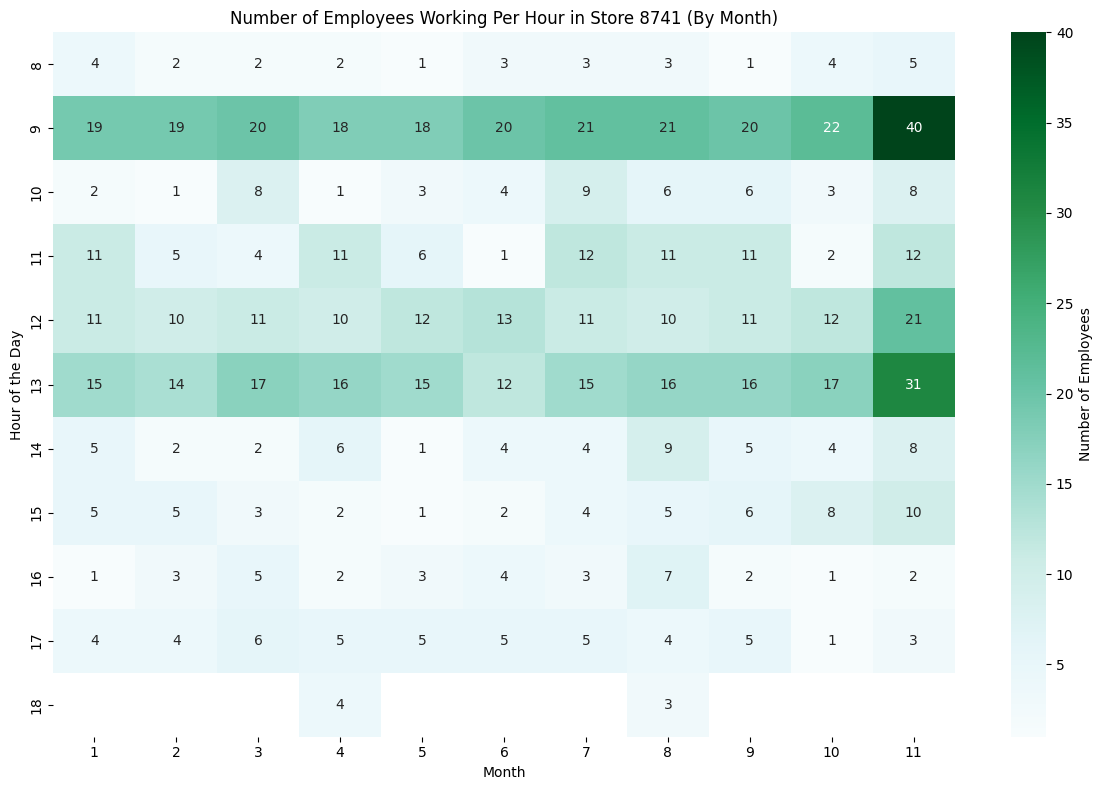

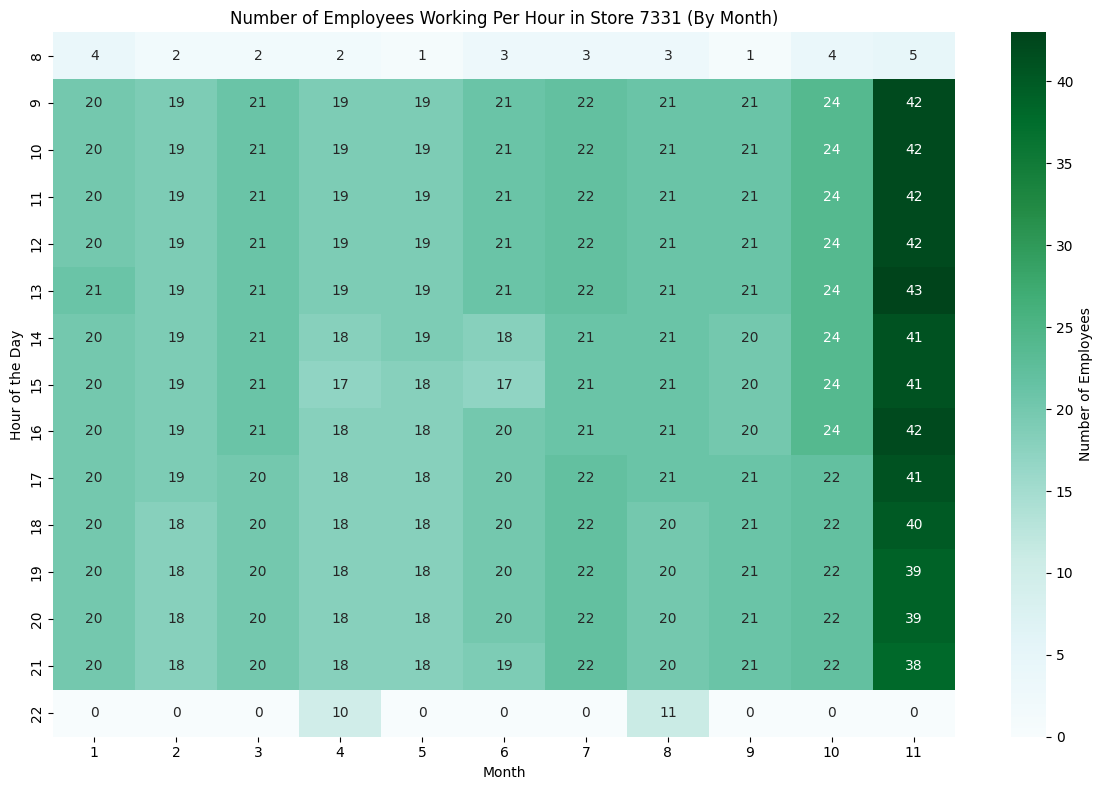

In [ ]:
# Filter data for store 8741 -->small store eparxia
store_8741_df = schedule_df[schedule_df['store'] == 8741]

# Extract month and hour information
store_8741_df['month'] = store_8741_df['date'].dt.month
store_8741_df['hour'] = store_8741_df['start_datetime'].dt.hour

# Count the number of employees working per hour for each month
hourly_counts = store_8741_df.groupby(['month', 'hour'])['employee id'].nunique().reset_index()
hourly_counts.rename(columns={'employee id': 'employee_count'}, inplace=True)

# Create a pivot table for visualization
hourly_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count')

# Plot the schedule visualization
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'})
plt.title('Number of Employees Working Per Hour in Store 8741 (By Month)')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

#whole duration of shift
#store_8841_df = schedule_df[schedule_df['store'] == 8741]
# Expand the range of hours covered by each employee's shift
expanded_hours = []
for _, row in store_8741_df.iterrows():
    for hour in range(row['start_datetime'].hour, row['end_datetime'].hour + 1):
        expanded_hours.append({'month': row['date'].month, 'hour': hour, 'employee_id': row['employee id']})

# Create a DataFrame for expanded hours
expanded_df = pd.DataFrame(expanded_hours)

# Count the number of employees working per hour for each month
hourly_counts = expanded_df.groupby(['month', 'hour'])['employee_id'].nunique().reset_index()
hourly_counts.rename(columns={'employee_id': 'employee_count'}, inplace=True)

# Create a pivot table for visualization
hourly_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count').fillna(0)

# Plot the schedule visualization
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'})
plt.title('Number of Employees Working Per Hour in Store 7331 (By Month)')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

In [129]:
# epoxiakotita 
# Extract month information before grouping
schedule_df['month'] = schedule_df['date'].dt.month

# Count how many months each employee worked
employee_month_counts = schedule_df.groupby('employee id')['month'].nunique()

# Categorize employees based on months worked
one_month = (employee_month_counts == 1).sum()
two_months = (employee_month_counts <= 3).sum()
three_months = (employee_month_counts == 4).sum()
whole_season = (employee_month_counts > 3).sum()

# Display the counts
print(f"\nNumber of employees who worked for one month: {one_month}")
print(f"Number of employees who worked for two months: {two_months}")
print(f"Number of employees who worked for three months: {three_months}")
print(f"Number of employees who worked the whole season: {whole_season}")

#these results dont add up to 246 why? --> problima me sinthikes



Number of employees who worked for one month: 66
Number of employees who worked for two months: 116
Number of employees who worked for three months: 13
Number of employees who worked the whole season: 130


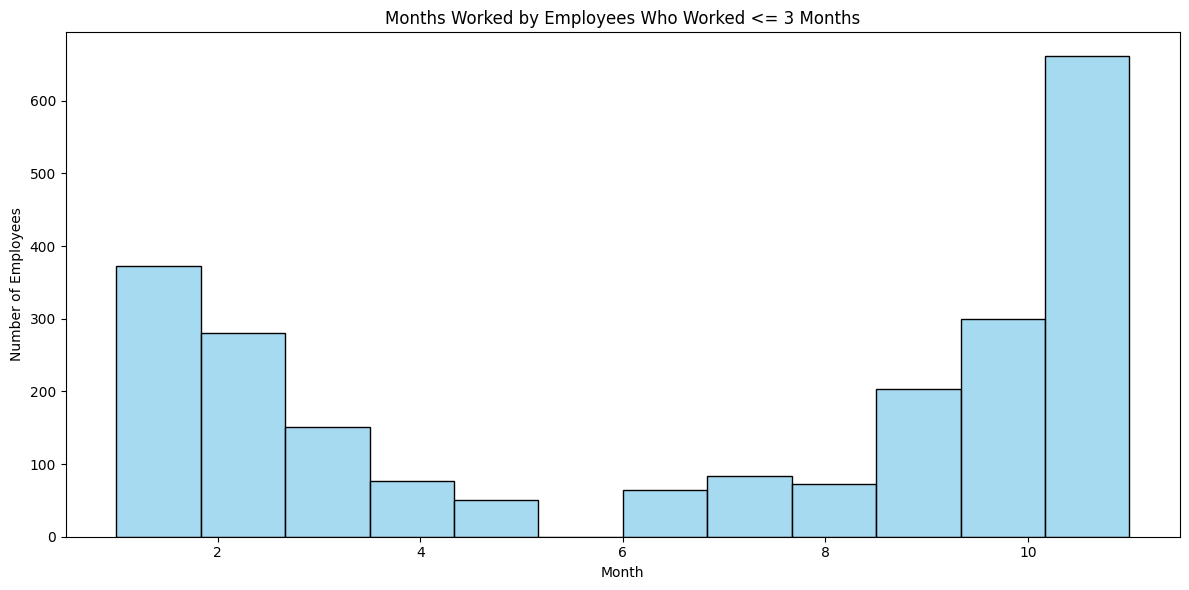

In [130]:
# Filter employees who worked <= 3 months
employees_limited_months = schedule_df[schedule_df['employee id'].isin(employee_month_counts[employee_month_counts <= 3].index)]

# Plot the months that these employees worked
plt.figure(figsize=(12, 6))
sns.histplot(employees_limited_months['month'], bins=12, kde=False, color='skyblue', edgecolor='black')
plt.title('Months Worked by Employees Who Worked <= 3 Months')
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


In [131]:
# Filter employees who worked in exactly 3 continuous months
schedule_df['year_month'] = schedule_df['date'].dt.to_period('M')
employee_month_sequences = schedule_df.groupby('employee id')['year_month'].apply(lambda x: sorted(x.unique()))

three_continuous_months = []
for employee_id, months in employee_month_sequences.items():
    for i in range(len(months) - 2):
        if months[i + 1] == months[i] + 1 and months[i + 2] == months[i] + 2:
            three_continuous_months.append((employee_id, months[i], months[i + 1], months[i + 2]))
            break

# Display the employees and their three continuous months
print("\nEmployees Who Worked for 3 Continuous Months and Their Months:")
for employee_id, month1, month2, month3 in three_continuous_months:
    print(f"Employee ID: {employee_id}, Months: {month1}, {month2}, {month3}")


# Count the frequency of each 3-month combination
month_combinations = [(month1, month2, month3) for _, month1, month2, month3 in three_continuous_months]
combination_counts = pd.Series(month_combinations).value_counts()

# Display the combinations and their frequencies
print("\n3-Month Combinations and Their Frequencies:")
for combination, count in combination_counts.items():
    print(f"Combination: {combination}, Frequency: {count}")



Employees Who Worked for 3 Continuous Months and Their Months:
Employee ID: 1001, Months: 2024-01, 2024-02, 2024-03
Employee ID: 5177, Months: 2024-01, 2024-02, 2024-03
Employee ID: 6766, Months: 2024-01, 2024-02, 2024-03
Employee ID: 10549, Months: 2024-01, 2024-02, 2024-03
Employee ID: 10770, Months: 2024-01, 2024-02, 2024-03
Employee ID: 12009, Months: 2024-01, 2024-02, 2024-03
Employee ID: 13437, Months: 2024-01, 2024-02, 2024-03
Employee ID: 14466, Months: 2024-01, 2024-02, 2024-03
Employee ID: 14760, Months: 2024-01, 2024-02, 2024-03
Employee ID: 15645, Months: 2024-01, 2024-02, 2024-03
Employee ID: 15694, Months: 2024-01, 2024-02, 2024-03
Employee ID: 16478, Months: 2024-01, 2024-02, 2024-03
Employee ID: 16482, Months: 2024-01, 2024-02, 2024-03
Employee ID: 128118221, Months: 2024-01, 2024-02, 2024-03
Employee ID: 128142676, Months: 2024-01, 2024-02, 2024-03
Employee ID: 128145707, Months: 2024-01, 2024-02, 2024-03
Employee ID: 140025263, Months: 2024-01, 2024-02, 2024-03
Emplo

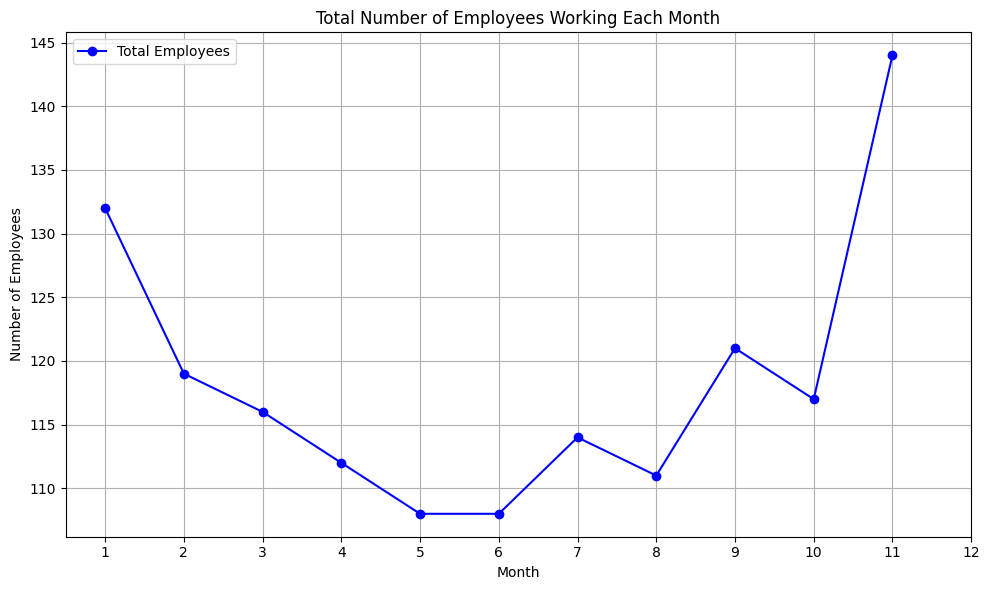

In [ ]:
# Plot the total number of employees working each month

# Calculate the number of unique employees working each month
monthly_employee_counts = schedule_df.groupby('month')['employee id'].nunique()

plt.figure(figsize=(10, 6))
plt.plot(monthly_employee_counts.index, monthly_employee_counts.values, marker='o', color='blue', label='Total Employees')
plt.title('Total Number of Employees Working Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


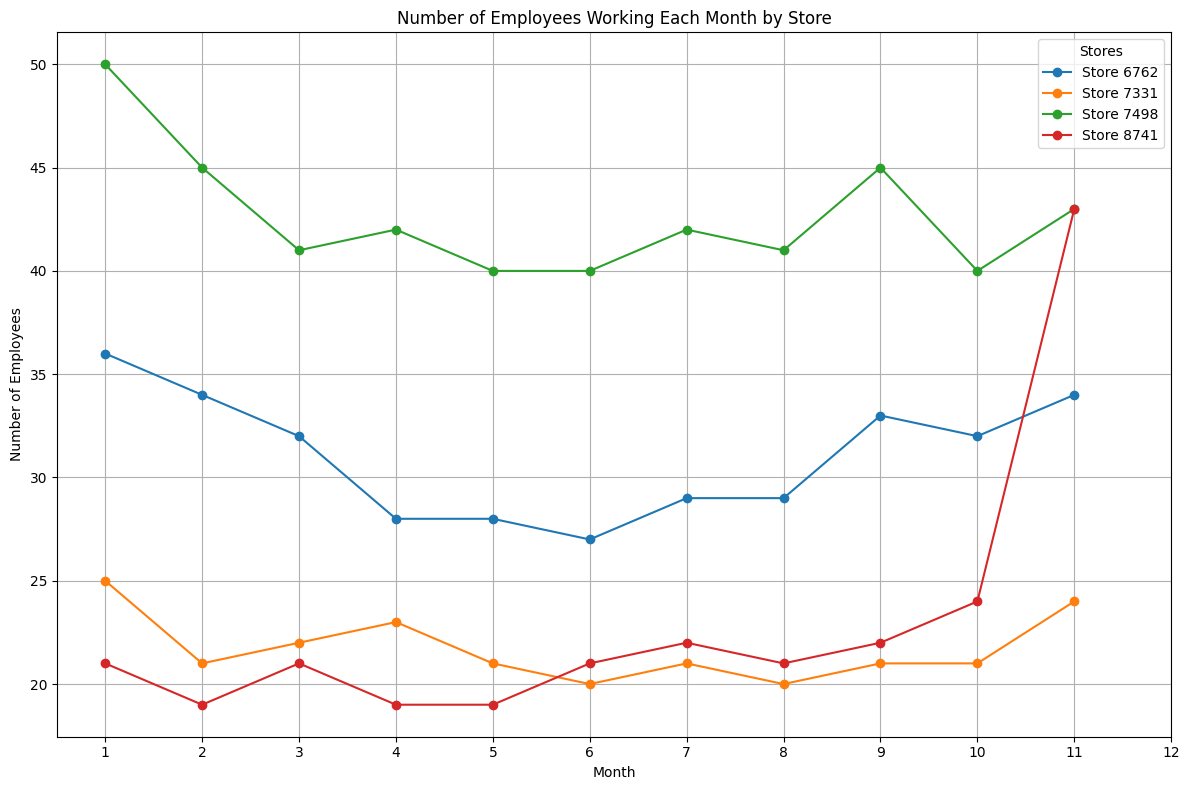

In [133]:
# Group by store and month to calculate the number of employees per store each month
store_monthly_employee_counts = schedule_df.groupby(['store', 'month'])['employee id'].nunique().reset_index()
store_monthly_pivot = store_monthly_employee_counts.pivot(index='month', columns='store', values='employee id').fillna(0)

# Plot the number of employees working each month by store
plt.figure(figsize=(12, 8))
for store in store_monthly_pivot.columns:
    plt.plot(store_monthly_pivot.index, store_monthly_pivot[store], marker='o', label=f"Store {store}")

plt.title('Number of Employees Working Each Month by Store')
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.legend(title="Stores")
plt.grid(True)
plt.tight_layout()
plt.show()


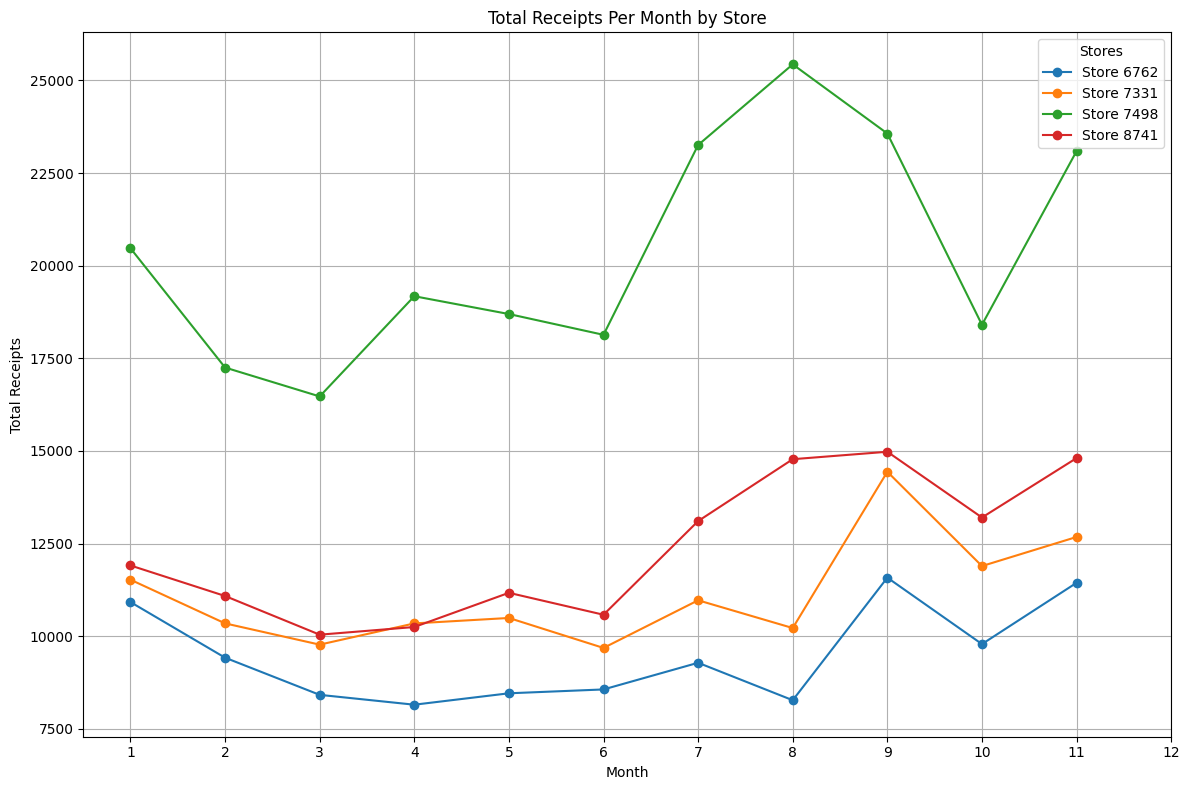

In [134]:
# Extract month information
receipts_df['month'] = receipts_df['date'].dt.month

# Group by store and month to calculate the total receipts per store each month
store_monthly_receipts = receipts_df.groupby(['store', 'month'])['receipts'].sum().reset_index()
store_monthly_pivot = store_monthly_receipts.pivot(index='month', columns='store', values='receipts').fillna(0)

# Plot the total receipts per month for each store
plt.figure(figsize=(12, 8))
for store in store_monthly_pivot.columns:
    plt.plot(store_monthly_pivot.index, store_monthly_pivot[store], marker='o', label=f"Store {store}")

plt.title('Total Receipts Per Month by Store')
plt.xlabel('Month')
plt.ylabel('Total Receipts')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.legend(title="Stores")
plt.grid(True)
plt.tight_layout()
plt.show()

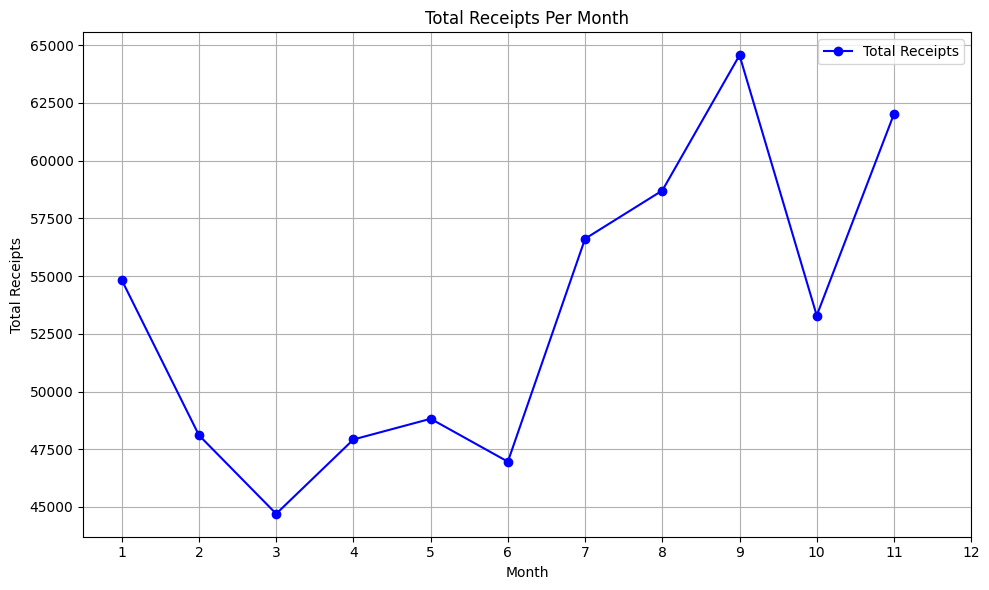

In [135]:
# Plot the total receipts for all stores combined per month
total_monthly_receipts = receipts_df.groupby('month')['receipts'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_monthly_receipts.index, total_monthly_receipts.values, marker='o', color='blue', label='Total Receipts')
plt.title('Total Receipts Per Month')
plt.xlabel('Month')
plt.ylabel('Total Receipts')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [136]:
# Count the number of days each store was open (days with scheduled employees)
open_days_by_store = schedule_df.groupby('store')['date'].nunique().reset_index()
open_days_by_store.rename(columns={'date': 'open_days'}, inplace=True)

# Print the number of open days for each store
print("\nNumber of Open Days by Store:")
print(open_days_by_store)



Number of Open Days by Store:
   store  open_days
0   6762        284
1   7331        284
2   7498        283
3   8741        283


In [137]:
# Count how many employees haven't worked in the past 2 months (October and November) --> Den deixne posoi efigan mono posoi den doulepsan lathos
schedule_df['month'] = schedule_df['date'].dt.month
recent_months = [10, 11]
recent_employees = schedule_df[schedule_df['month'].isin(recent_months)]['employee id'].unique()
all_employees = schedule_df['employee id'].unique()
inactive_employees = set(all_employees) - set(recent_employees)

print(f"\nNumber of employees who haven't worked in October and November: {len(inactive_employees)}")


Number of employees who haven't worked in October and November: 96


In [ ]:
# Count how many inactive employees are associated with each store
inactive_employees_by_store = schedule_df[schedule_df['employee id'].isin(inactive_employees)].groupby('store')['employee id'].nunique().reset_index()
inactive_employees_by_store.rename(columns={'employee id': 'inactive_employee_count'}, inplace=True)

print(f"\nNumber of employees who haven't worked in October and November: {len(inactive_employees)}")
print("\nInactive Employees by Store:")
print(inactive_employees_by_store)



Number of employees who haven't worked in October and November: 96

Inactive Employees by Store:
   store  inactive_employee_count
0   6762                       23
1   7331                       16
2   7498                       37
3   8741                       20


In [139]:
#posoi apo autous pou apoxorisan den einai seasonal --> to xo 
#posoi ekatsan se olo to etos 
#posoi ana katastima emeinan se olo to etos
#uparxei mera pou den exo visistor -receipts kai exo employess
#uparxei mera pou den exo visitors kai exo receipts --> outlier

In [140]:
# Analyze activity of inactive employees across earlier months
inactive_employees_df = schedule_df[schedule_df['employee id'].isin(inactive_employees)]

# Count the number of months each inactive employee worked
inactive_months_worked = inactive_employees_df.groupby('employee id')['month'].nunique()

# Categorize inactive employees based on months worked
inactive_categories = {
    '>=6 months': (inactive_months_worked >= 6).sum(),
    '(6,4) months': ((inactive_months_worked < 6) & (inactive_months_worked >= 4)).sum(),
    '(4,2) months': ((inactive_months_worked <= 4) & (inactive_months_worked > 2)).sum(),
    '2 months or less': (inactive_months_worked <= 2).sum()
}

# Print the categorized counts
print("\nInactive Employees Categorized by Months Worked:")
for category, count in inactive_categories.items():
    print(f"{category}: {count}")

print(inactive_employees_df.head())


Inactive Employees Categorized by Months Worked:
>=6 months: 23
(6,4) months: 13
(4,2) months: 19
2 months or less: 46
          date     start       end  store  employee id      start_datetime  \
286 2024-01-03  08:30:00  16:30:00   6762        12009 2024-01-03 08:30:00   
287 2024-01-04  08:30:00  16:30:00   6762        12009 2024-01-04 08:30:00   
288 2024-01-05  08:30:00  16:30:00   6762        12009 2024-01-05 08:30:00   
289 2024-01-08  09:00:00  17:00:00   6762        12009 2024-01-08 09:00:00   
290 2024-01-10  09:00:00  17:00:00   6762        12009 2024-01-10 09:00:00   

           end_datetime  shift_duration shift_type  employee_id_length  month  \
286 2024-01-03 16:30:00             8.0  Full-Time                   5      1   
287 2024-01-04 16:30:00             8.0  Full-Time                   5      1   
288 2024-01-05 16:30:00             8.0  Full-Time                   5      1   
289 2024-01-08 17:00:00             8.0  Full-Time                   5      1   
290 20

In [141]:
# Count how many inactive employees worked in the previous month (September)
previous_month = 9
inactive_previous_month = inactive_employees_df[inactive_employees_df['month'] == previous_month]['employee id'].nunique()

print(f"\nNumber of inactive employees who worked in September: {inactive_previous_month}")

# Count how many inactive employees had worked only the 3 previous months
previous_months = [7, 8, 9]
inactive_previous_employees = inactive_employees_df[inactive_employees_df['month'].isin(previous_months)]
worked_three_months = inactive_previous_employees.groupby('employee id')['month'].nunique()
only_three_months = worked_three_months[worked_three_months == 3].count()

print(f"\nNumber of inactive employees who worked only the 3 previous months (July, August, September): {only_three_months}")



Number of inactive employees who worked in September: 19

Number of inactive employees who worked only the 3 previous months (July, August, September): 5


In [142]:
# Count employees by store who stayed for <2, <6, <11 months--> Pistotita upallilon

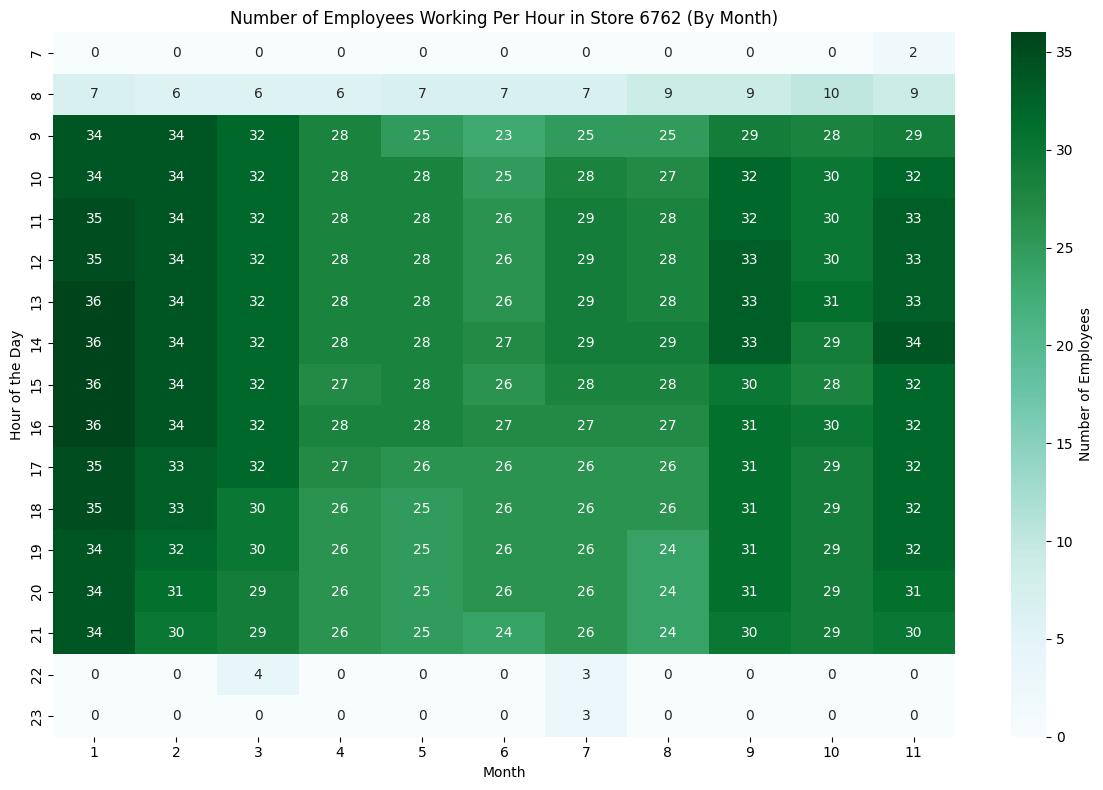

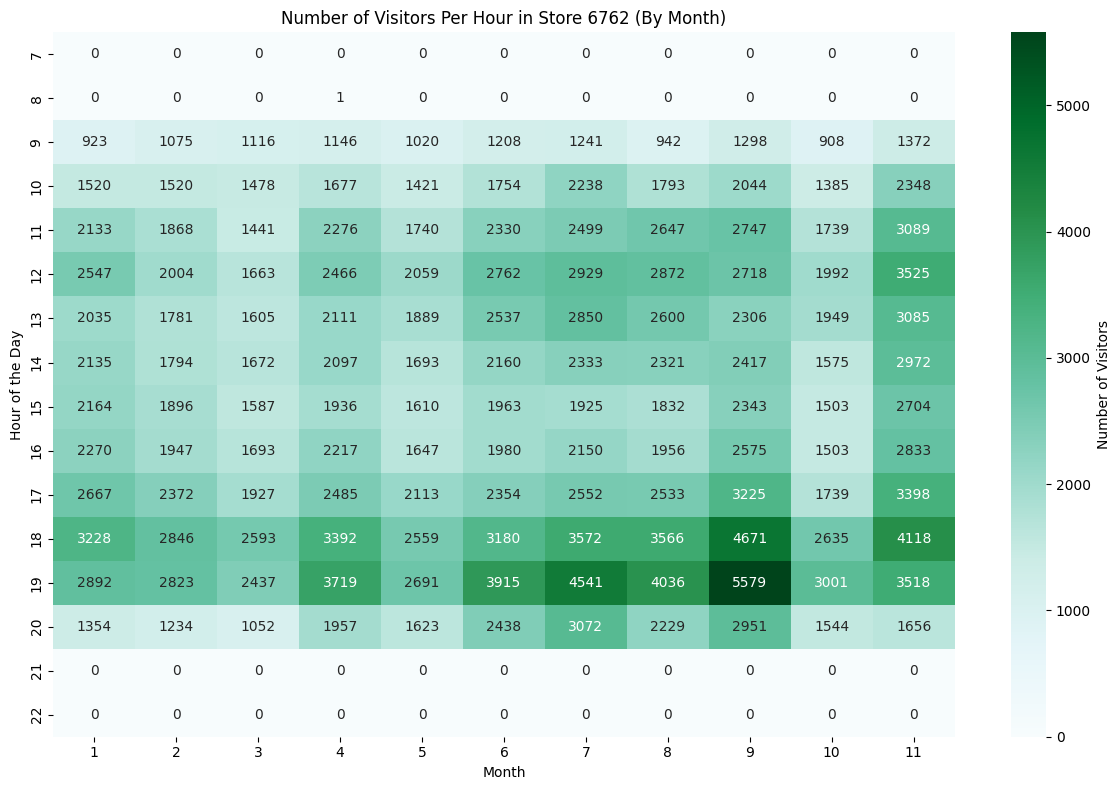

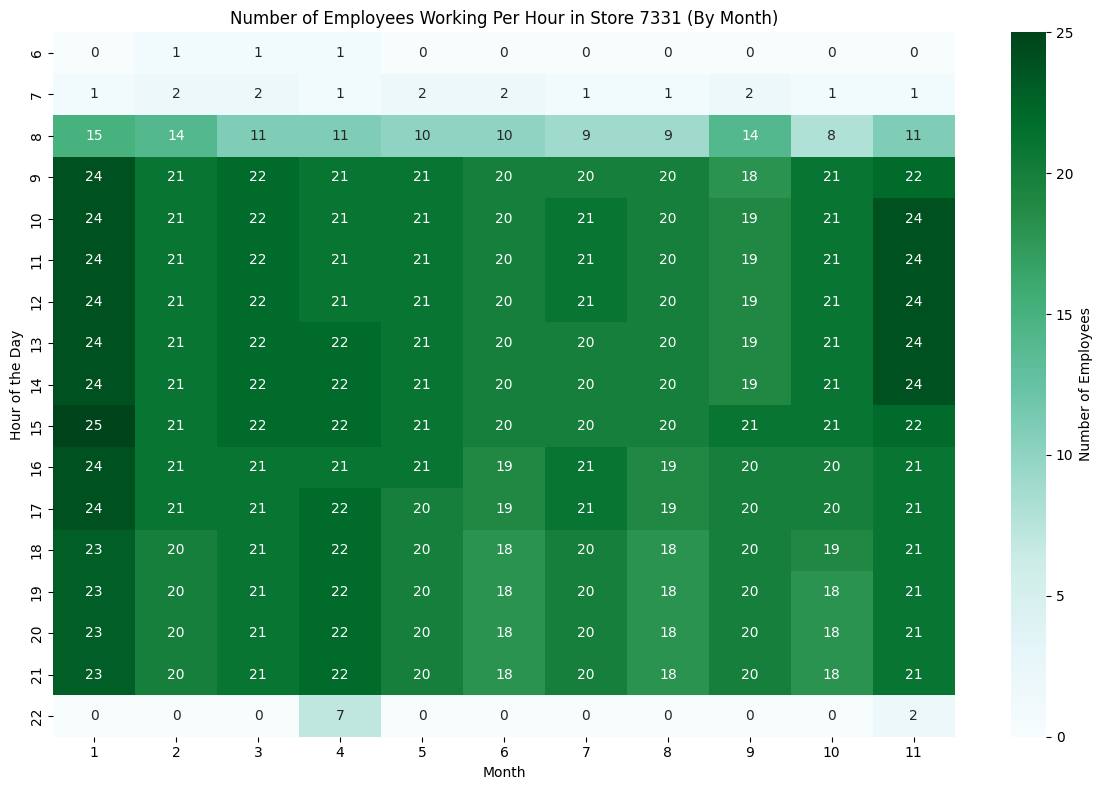

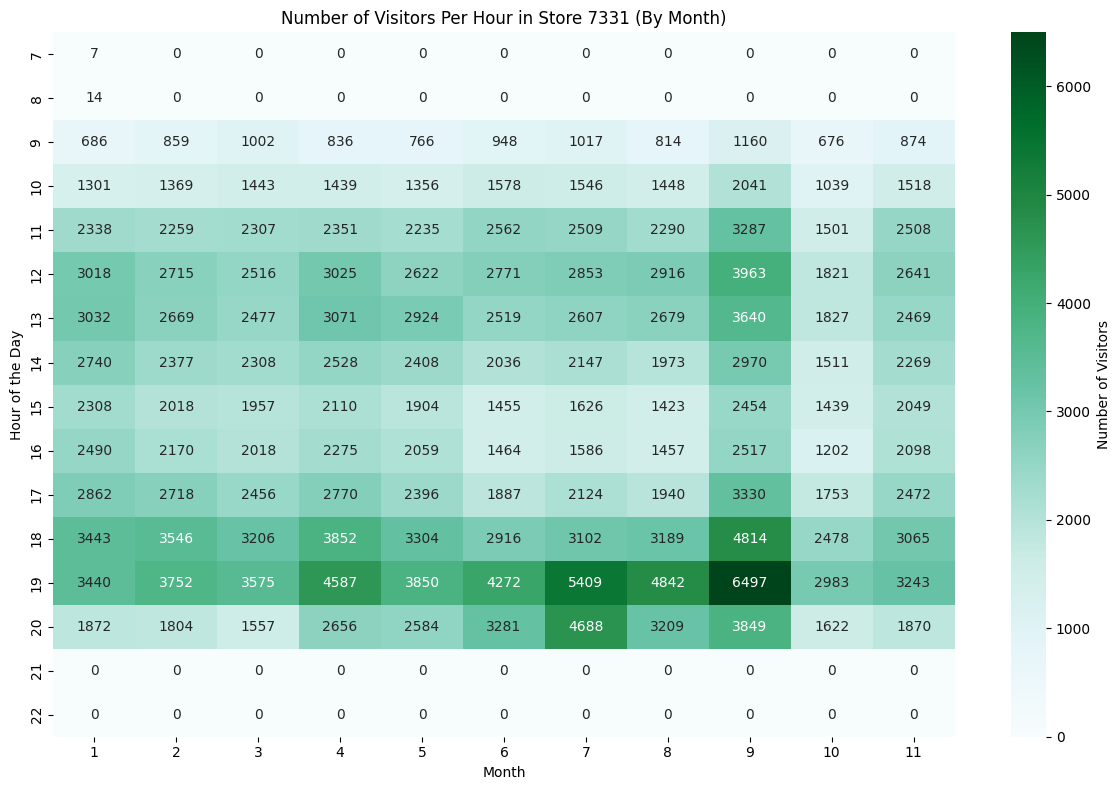

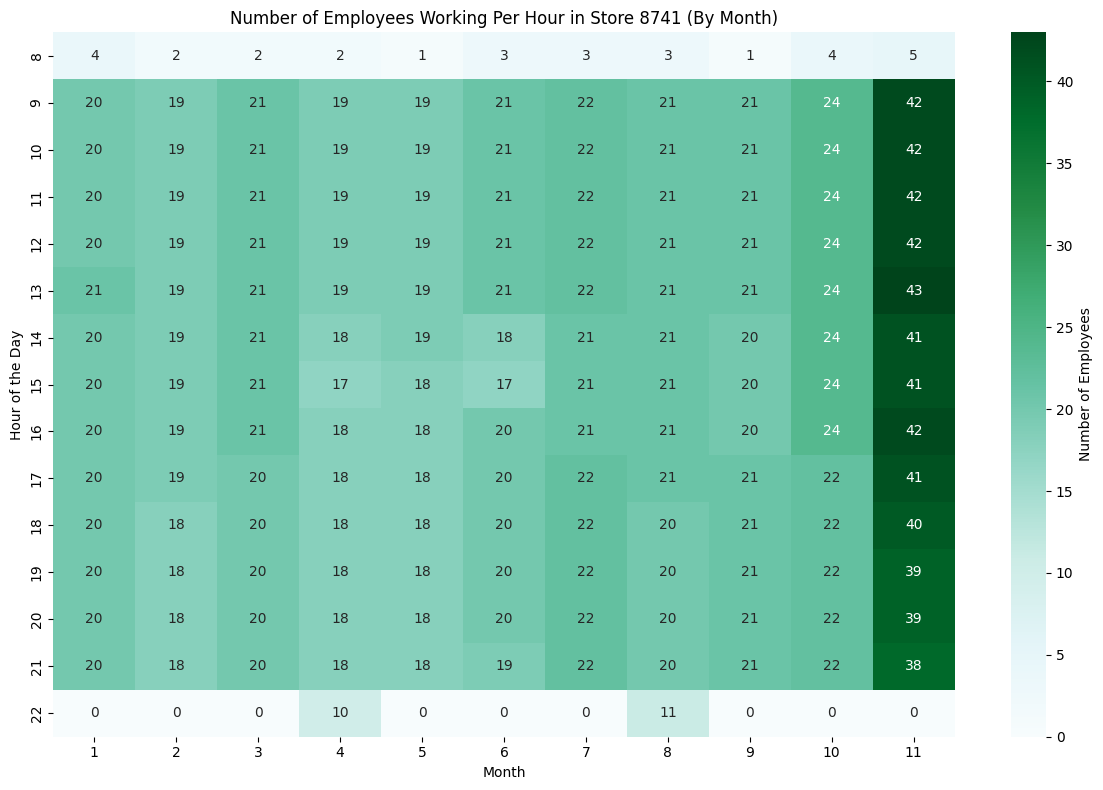

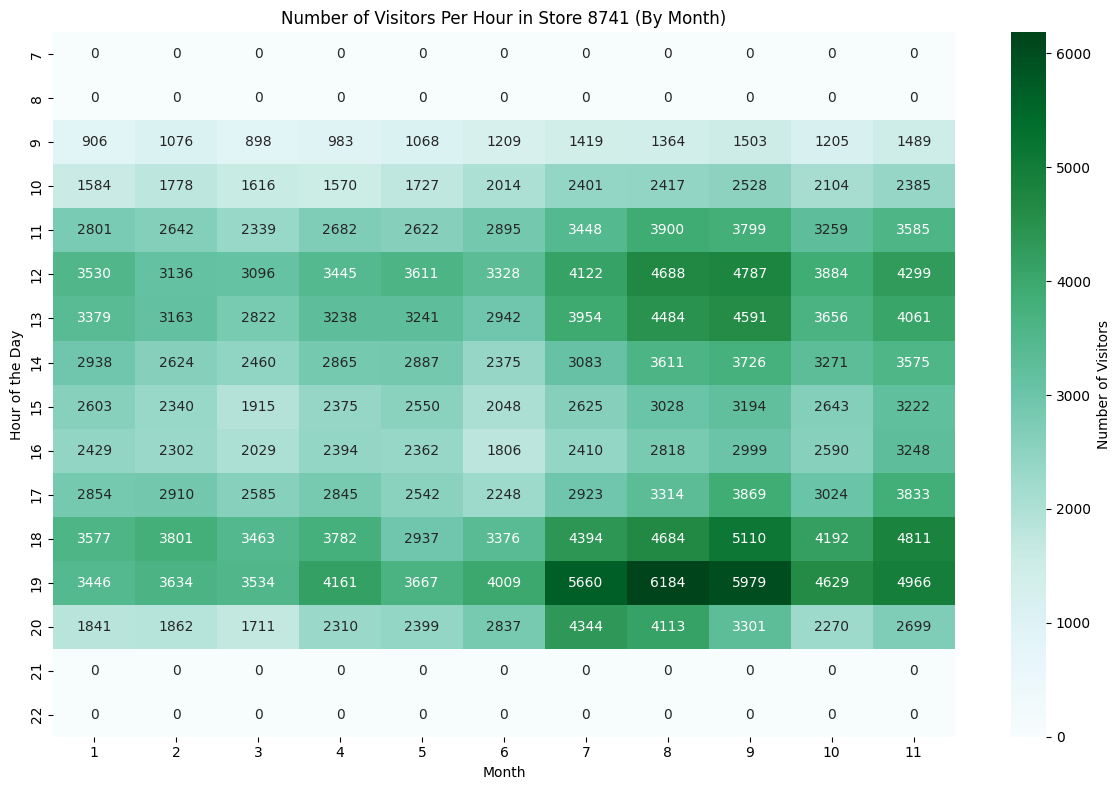

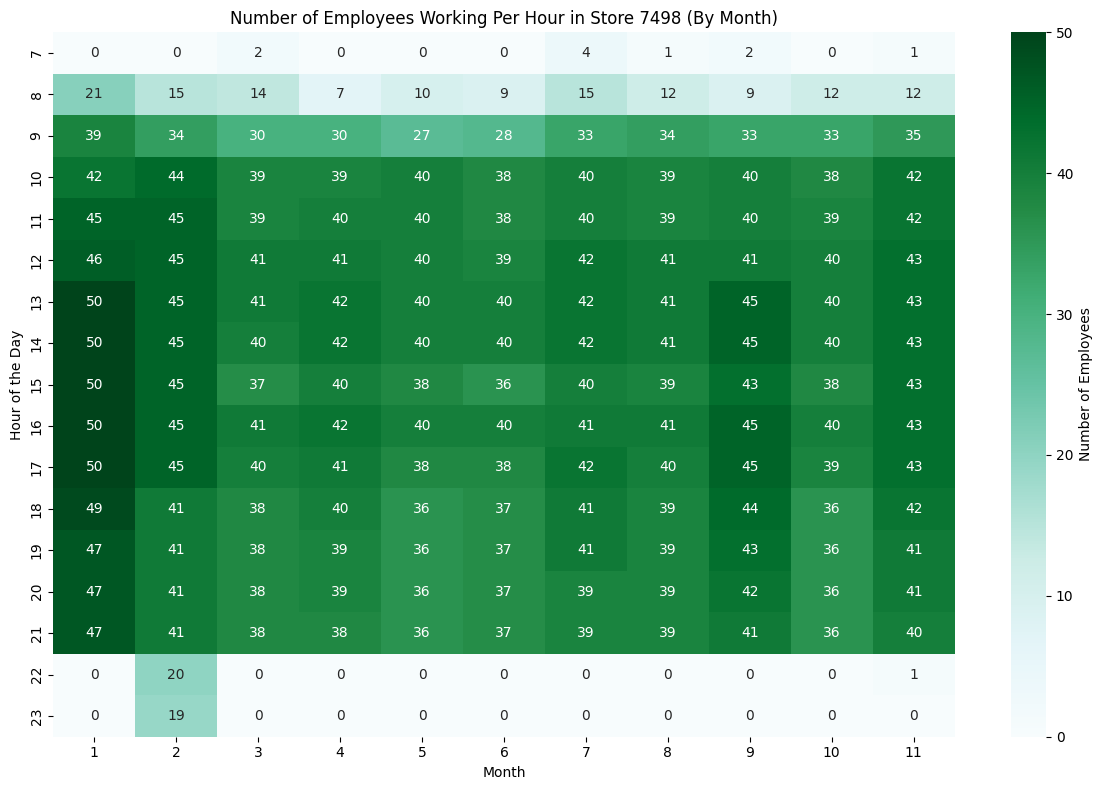

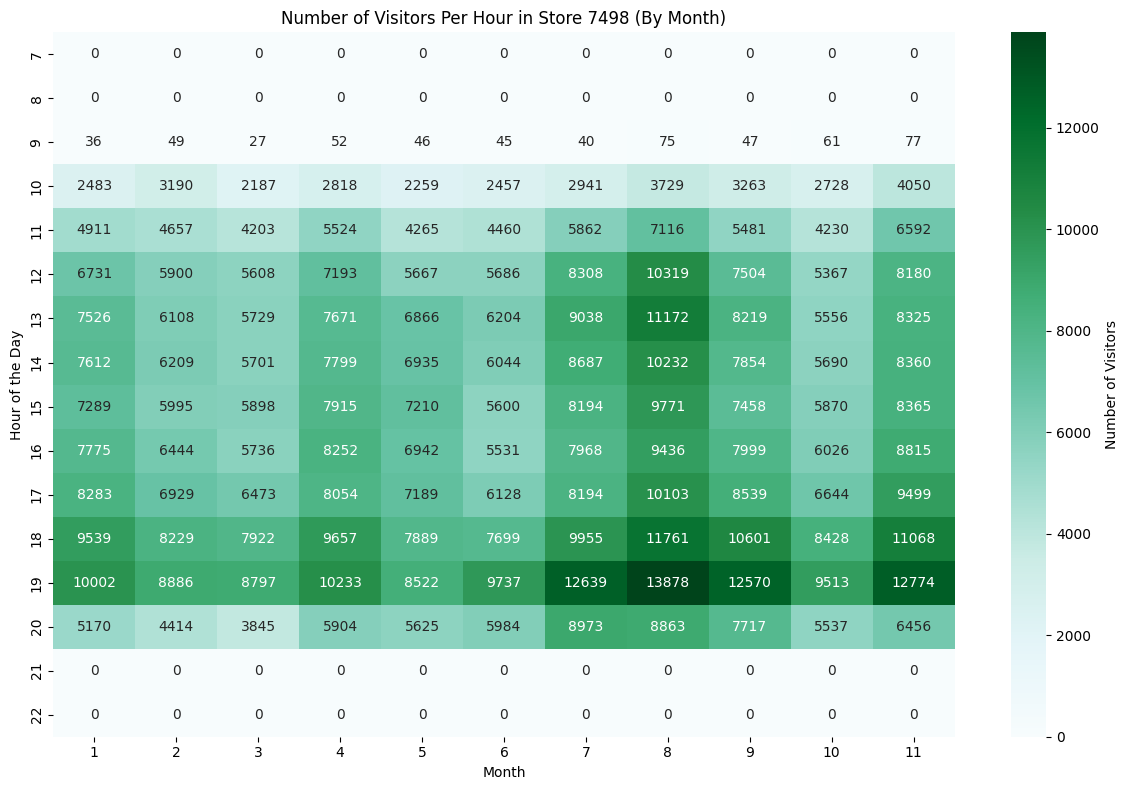


Total Employees by Store:
Store 6762: Total Employees = 4322
Store 7331: Total Employees = 3126
Store 8741: Total Employees = 3216
Store 7498: Total Employees = 5952


In [143]:
# Loop through multiple stores
stores = [6762, 7331, 8741, 7498]  # Replace with your actual store IDs
heatmaps = {}  # Dictionary to store both employee and visitor heatmaps for each store
total_employees_by_store = {}  # Dictionary to store total employees per store

for store_id in stores:
    # ---- EMPLOYEE HEATMAP ----
    # Filter data for the store
    store_df = schedule_df[schedule_df['store'] == store_id].copy()

    # Expand the range of hours covered by each employee's shift
    expanded_hours = []
    for _, row in store_df.iterrows():
        for hour in range(row['start_datetime'].hour, row['end_datetime'].hour + 1):
            expanded_hours.append({'month': row['date'].month, 'hour': hour, 'employee_id': row['employee id']})

    # Create a DataFrame for expanded hours
    expanded_df = pd.DataFrame(expanded_hours).copy()

    # Count the number of employees working per hour for each month
    hourly_counts = expanded_df.groupby(['month', 'hour'])['employee_id'].nunique().reset_index()
    hourly_counts.rename(columns={'employee_id': 'employee_count'}, inplace=True)

    # Create a pivot table for employees
    employee_pivot = hourly_counts.pivot(index='hour', columns='month', values='employee_count').fillna(0).copy()

    # ---- VISITOR HEATMAP ----
    # Filter visitor data for the store
    visitor_df = visitors_df[visitors_df['store'] == store_id].copy()

    # Extract month and hour information
    visitor_df['month'] = visitor_df['date'].dt.month
    visitor_df['hour'] = visitor_df['hour']

    # Group by month and hour to calculate the count of visitors
    visitor_counts = visitor_df.groupby(['month', 'hour'])['visitors'].sum().reset_index()
    visitor_counts.rename(columns={'visitors': 'visitor_count'}, inplace=True)

    # Create a pivot table for visitors
    visitor_pivot = visitor_counts.pivot(index='hour', columns='month', values='visitor_count').fillna(0).copy()

    # Store both employee and visitor heatmaps in the dictionary
    heatmaps[store_id] = {
        'employee_pivot': employee_pivot,
        'visitor_pivot': visitor_pivot,
    }

     # Calculate total employees from the employee heatmap
    total_employees = employee_pivot.sum().sum()
    total_employees_by_store[store_id] = total_employees

    # Plot the employee heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(employee_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'})
    plt.title(f'Number of Employees Working Per Hour in Store {store_id} (By Month)')
    plt.xlabel('Month')
    plt.ylabel('Hour of the Day')
    plt.tight_layout()
    plt.show()

    # Plot the visitor heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(visitor_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Visitors'})
    plt.title(f'Number of Visitors Per Hour in Store {store_id} (By Month)')
    plt.xlabel('Month')
    plt.ylabel('Hour of the Day')
    plt.tight_layout()
    plt.show()

# Print total employees for each store
print("\nTotal Employees by Store:")
for store_id, total in total_employees_by_store.items():
    print(f"Store {store_id}: Total Employees = {total:.0f}")

In [ ]:
# Heatmap for Store 7498, Month 8, Week 2
store_id = 7498
selected_month = 8
selected_week = 32

# Filter data for store 7498 in the second week of August
visitor_data = visitors_df[(visitors_df['store'] == store_id) & 
                           (visitors_df['date'].dt.month == selected_month) & 
                           (visitors_df['date'].dt.isocalendar().week == selected_week)]

employee_data = schedule_df[(schedule_df['store'] == store_id) & 
                            (schedule_df['date'].dt.month == selected_month) & 
                            (schedule_df['date'].dt.isocalendar().week == selected_week)]


# Process visitor data
visitor_data['hour'] = visitor_data['hour']
visitor_pivot = visitor_data.pivot_table(index='hour', columns='date', values='visitors', aggfunc='sum', fill_value=0)

print(visitors_df.head())
print(schedule_df.head())

# Debugging: Check available months and weeks in the data
print("Unique months in visitors_df:", visitors_df['date'].dt.month.unique())
print("Unique weeks in visitors_df:", visitors_df['date'].dt.isocalendar().week.unique())
print("Unique months in schedule_df:", schedule_df['date'].dt.month.unique())
print("Unique weeks in schedule_df:", schedule_df['date'].dt.isocalendar().week.unique())



print(visitor_data.head(20))
print(employee_data.head(20))

   store       date  hour  visitors
0   7498 2024-02-11    20         0
1   7498 2024-04-09     8         0
2   7498 2024-09-02    22         0
3   7498 2024-10-21    21         0
4   7331 2024-07-25    15        33
        date     start       end  store  employee id      start_datetime  \
0 2024-01-03  09:00:00  17:00:00   7498         1001 2024-01-03 09:00:00   
1 2024-01-04  09:00:00  17:00:00   7498         1001 2024-01-04 09:00:00   
2 2024-01-05  13:00:00  21:00:00   7498         1001 2024-01-05 13:00:00   
3 2024-01-08  13:00:00  21:00:00   7498         1001 2024-01-08 13:00:00   
4 2024-01-09  13:00:00  21:00:00   7498         1001 2024-01-09 13:00:00   

         end_datetime  
0 2024-01-03 17:00:00  
1 2024-01-04 17:00:00  
2 2024-01-05 21:00:00  
3 2024-01-08 21:00:00  
4 2024-01-09 21:00:00  
Unique months in visitors_df: [ 2  4  9 10  7  8  3  6 11  1  5]
Unique weeks in visitors_df: <IntegerArray>
[ 6, 15, 36, 43, 30, 17, 33, 40, 35, 10, 23, 12,  9, 48,  4, 13, 24, 14, 4

C:\Users\User\AppData\Local\Temp\ipykernel_17508\1067059630.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_data['hour'] = visitor_data['hour']


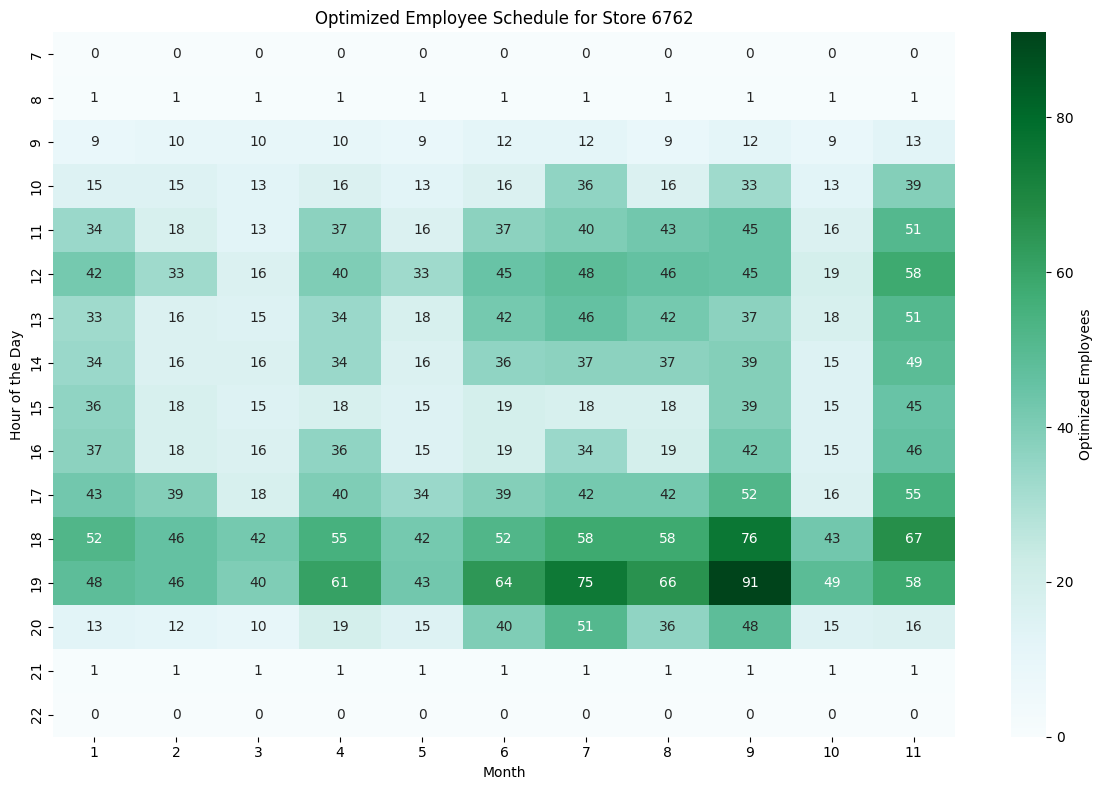

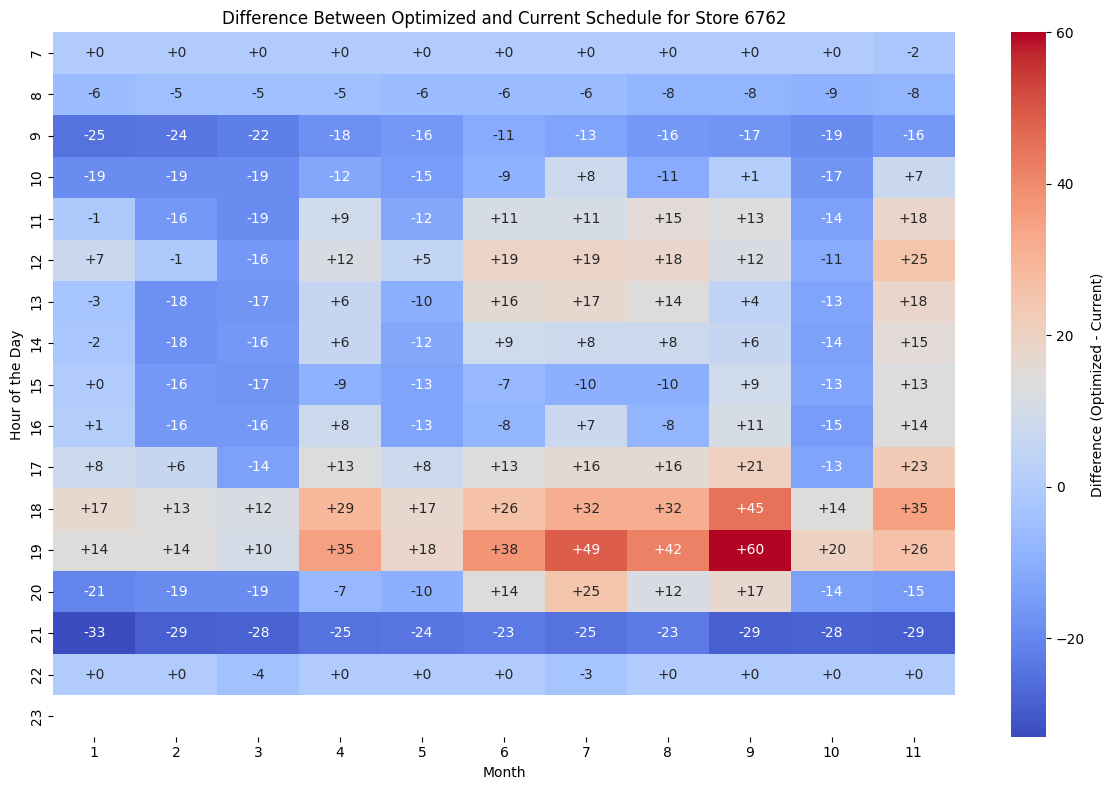

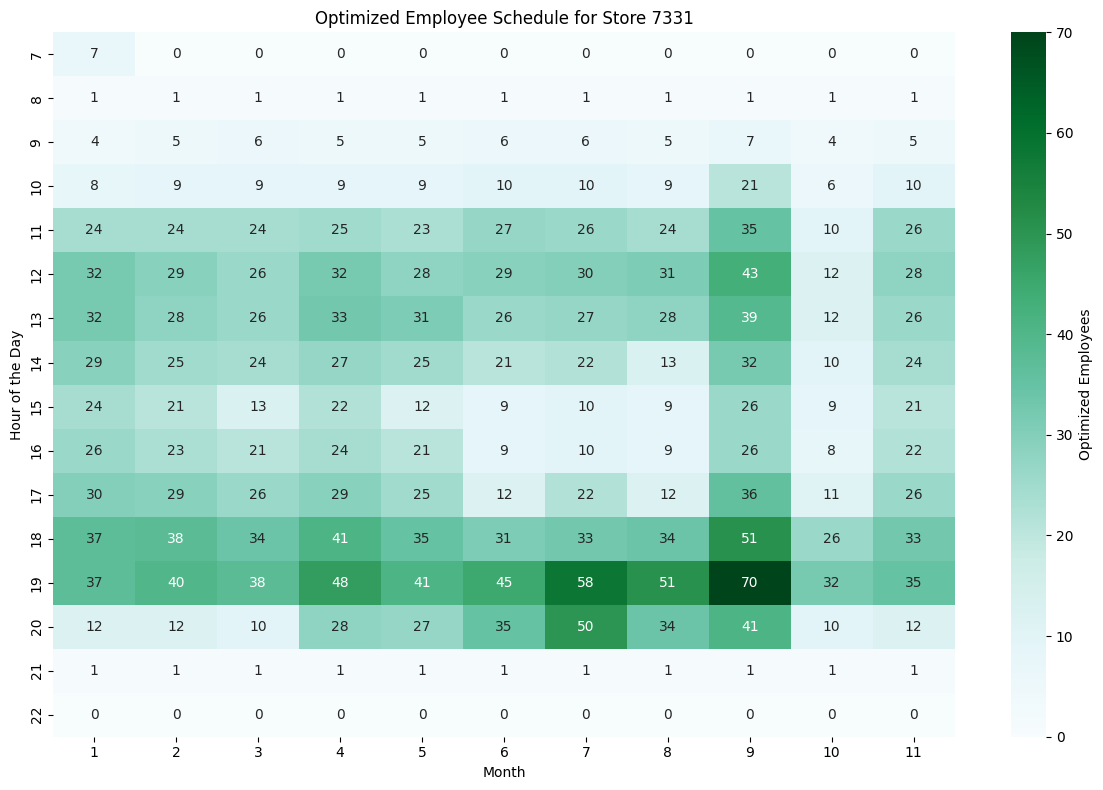

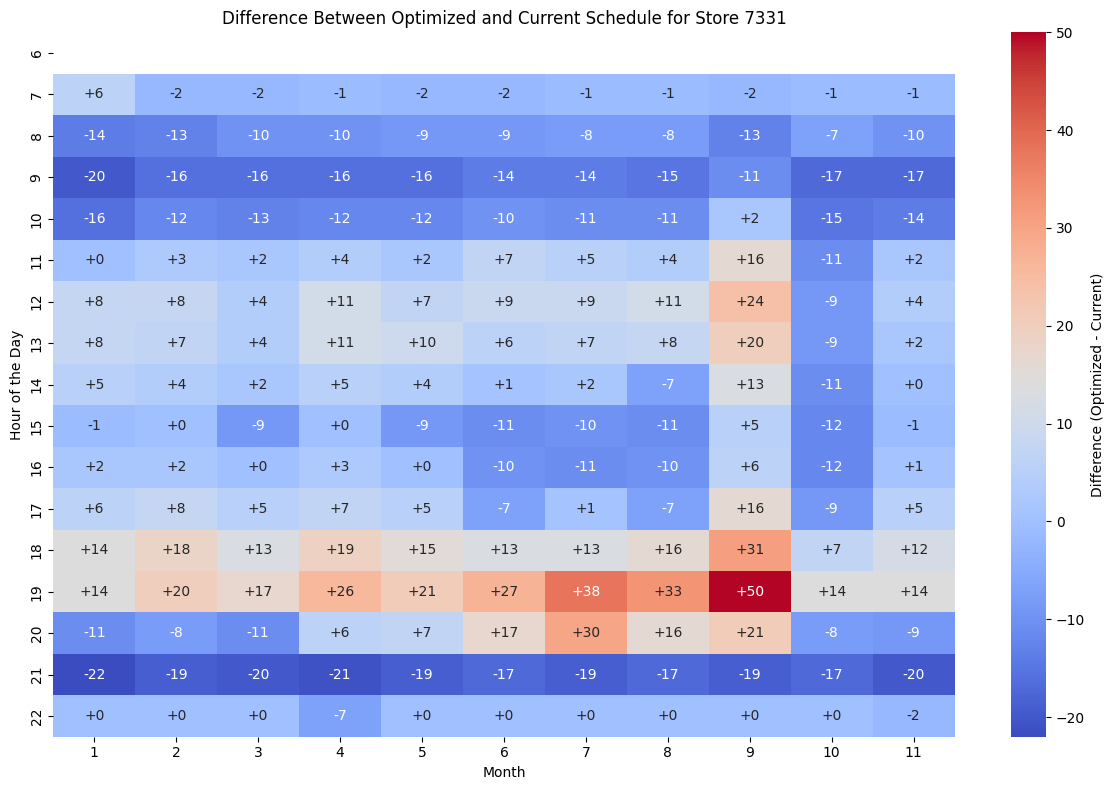

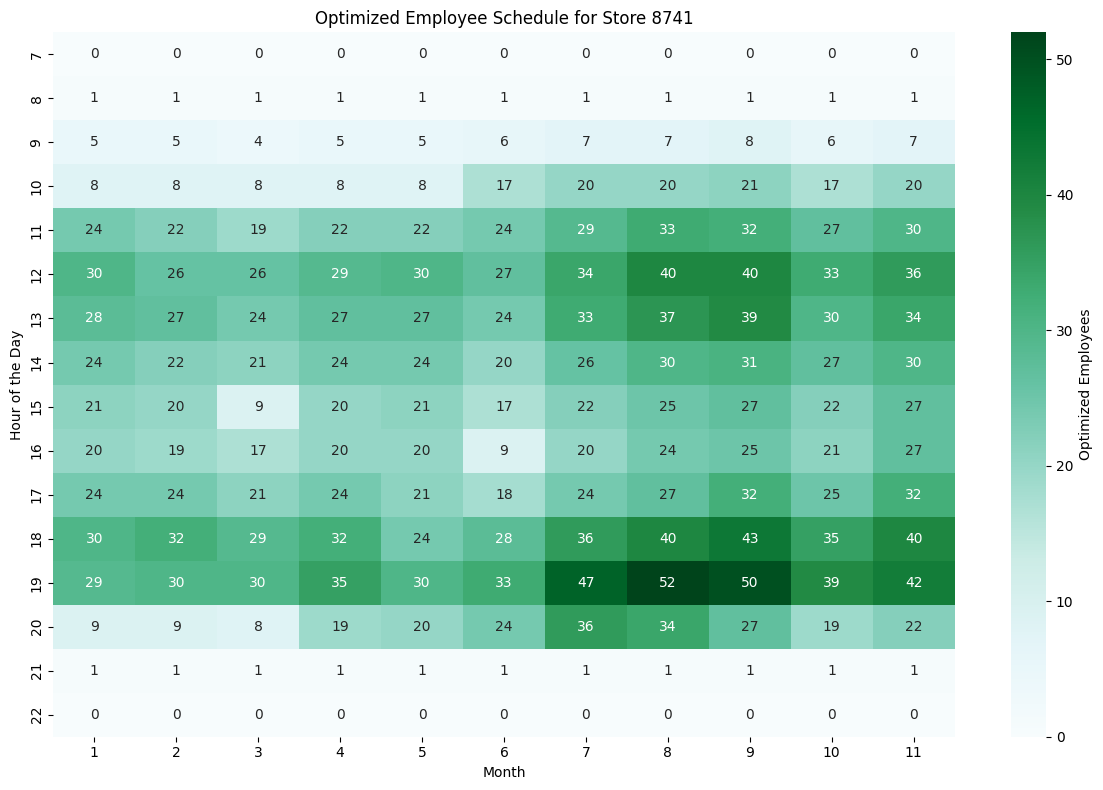

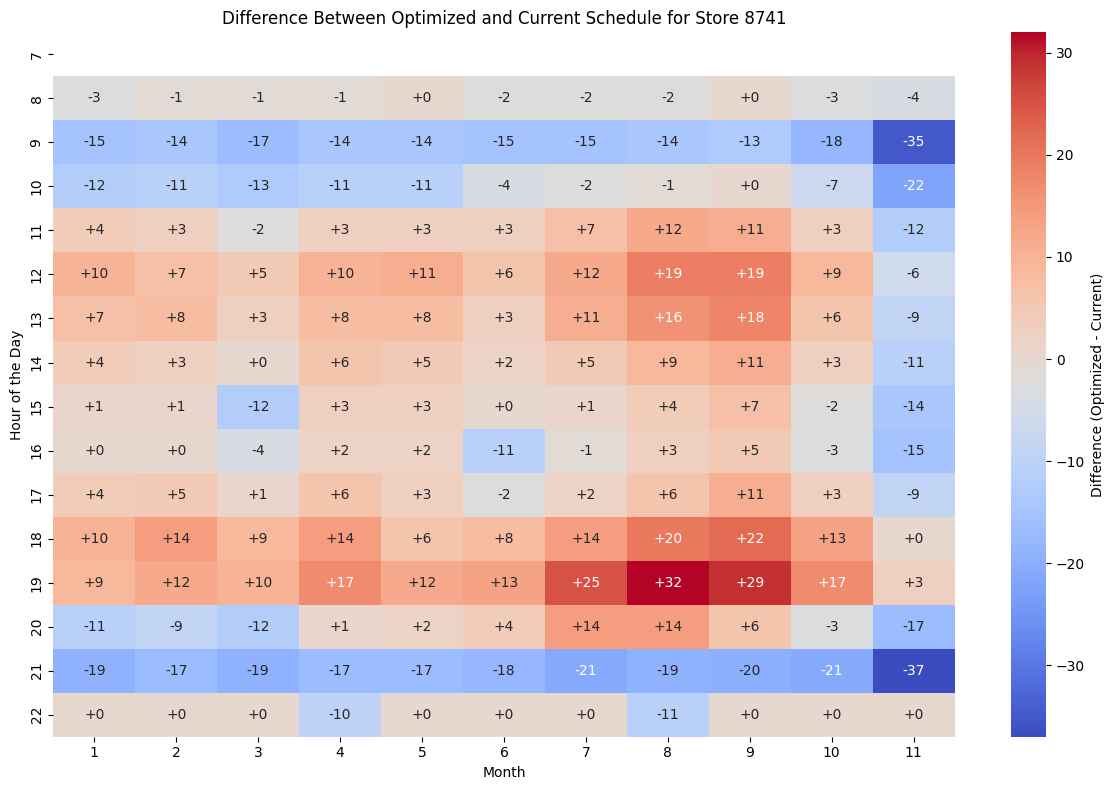

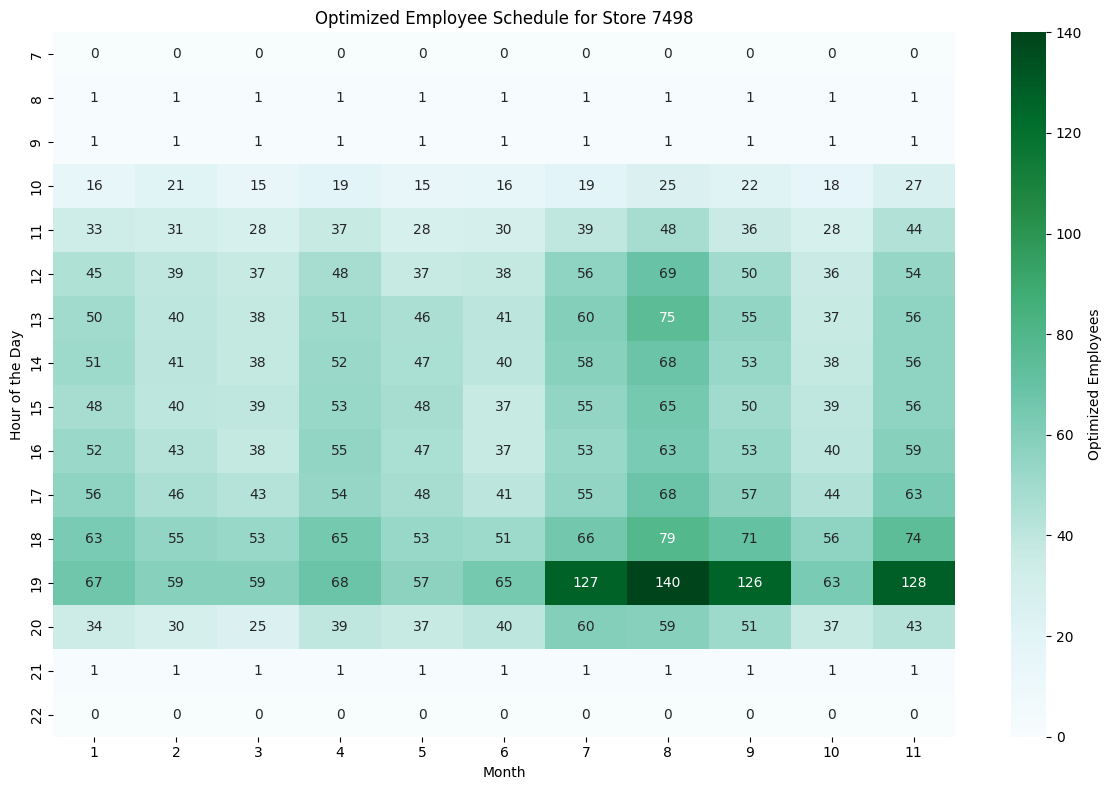

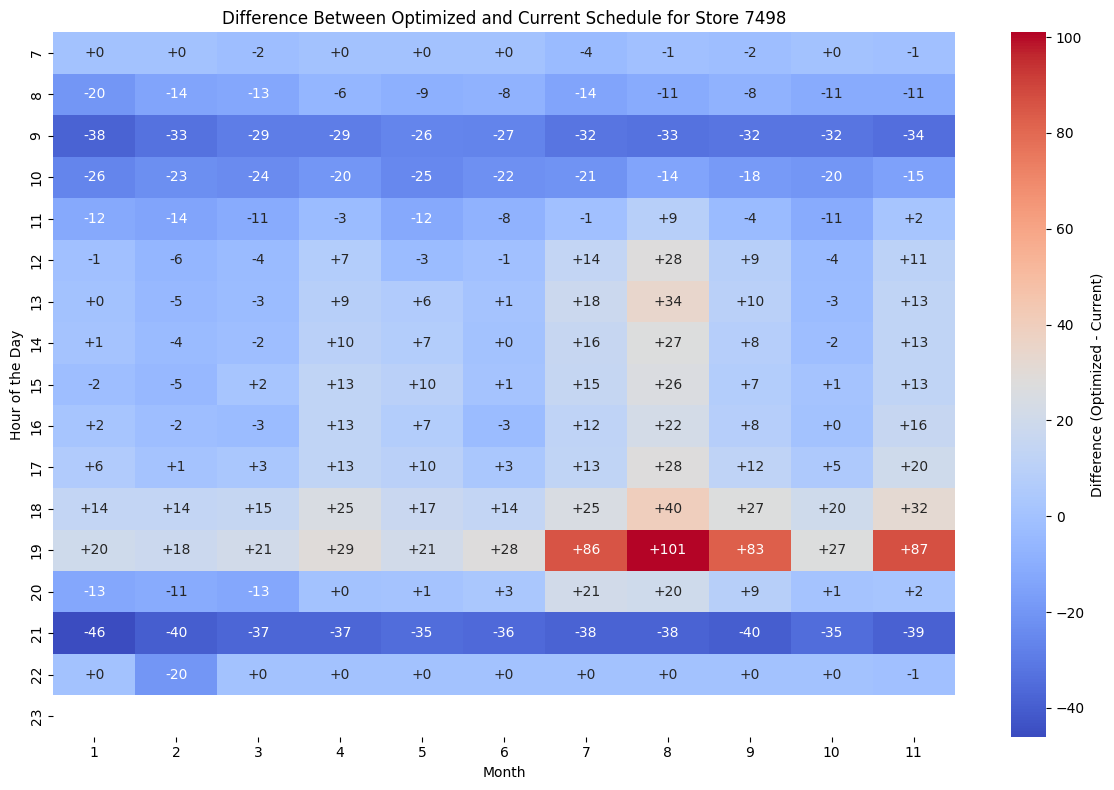


Total Employees (Optimized) by Store:
Store 6762: Total Employees = 4298
Store 7331: Total Employees = 3137
Store 8741: Total Employees = 3224
Store 7498: Total Employees = 5973


In [144]:
# Define parameters for optimization -->kalutero apo ola try same total
NORMAL_THRESHOLD = 90  # Visitors per employee during normal hours
PEAK_MULTIPLIER = 1.5  # Additional multiplier for peak hours
LOW_MULTIPLIER = 0.6
LOW_TIME_MIN_EMPLOYEES = 1  # Minimum employees during low times
PEAK_THRESHOLD = 12000  # Visitor count to consider peak time
LOW_THRESHOLD = 2000  # Visitor count to consider low time

# Maximum employee limits by store
max_employees_by_store = {
    6762: 4322,
    7331: 3126,
    8741: 3216,
    7498: 5962,
}

# Store optimized employee schedules for each store
optimized_schedules = {}
optimized_totals = {}

# Loop through each store and dynamically structure employees
for store_id in stores:
    # Get the visitor pivot table for the store
    visitor_heatmap = heatmaps[store_id]['visitor_pivot']

    # Create a new DataFrame for the optimized employee schedule
    optimized_employee_heatmap = visitor_heatmap.copy()

    # Apply the optimization algorithm
    for hour in visitor_heatmap.index:
        for month in visitor_heatmap.columns:
            visitors = visitor_heatmap.at[hour, month]

            # Skip optimization for specific hours
            if hour in [7, 22]:
                employees = optimized_employee_heatmap.at[hour, month]  # Retain the original value --> this is not orgininal !!!
            # Low time
            elif visitors < LOW_THRESHOLD:
                employees =  max(1, int((visitors / NORMAL_THRESHOLD) * LOW_MULTIPLIER))
            # Peak time
            elif visitors > PEAK_THRESHOLD:
                employees = max(1, int((visitors / NORMAL_THRESHOLD) * PEAK_MULTIPLIER))
            # Normal time
            else:
                employees = max(1, int(visitors / NORMAL_THRESHOLD))

            # Assign employees to the heatmap
            optimized_employee_heatmap.at[hour, month] = employees

    # Dynamically scale the heatmap to match max_employees_by_store
    current_total_employees = optimized_employee_heatmap.sum().sum()
    target_total_employees = max_employees_by_store[store_id]

    # Scale down or up to match the target total
    scale_factor = target_total_employees / current_total_employees
    optimized_employee_heatmap *= scale_factor
    optimized_employee_heatmap = optimized_employee_heatmap.round()

    # Store the optimized schedule in the dictionary
    optimized_schedules[store_id] = optimized_employee_heatmap

    # Calculate the total number of employees for this store
    total_employees = optimized_employee_heatmap.sum().sum()
    optimized_totals[store_id] = total_employees

    # Plot the optimized heatmap for the store
    plt.figure(figsize=(12, 8))
    sns.heatmap(optimized_employee_heatmap, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Optimized Employees'})
    plt.title(f'Optimized Employee Schedule for Store {store_id}')
    plt.xlabel('Month')
    plt.ylabel('Hour of the Day')
    plt.tight_layout()
    plt.show()

    # Plot the difference between current and optimized schedules
    current_employee_heatmap = heatmaps[store_id]['employee_pivot']
    difference_heatmap = optimized_employee_heatmap - current_employee_heatmap

    plt.figure(figsize=(12, 8))
    sns.heatmap(difference_heatmap, annot=True, fmt='+.0f', cmap='coolwarm', cbar_kws={'label': 'Difference (Optimized - Current)'})
    plt.title(f'Difference Between Optimized and Current Schedule for Store {store_id}')
    plt.xlabel('Month')
    plt.ylabel('Hour of the Day')
    plt.tight_layout()
    plt.show()

# Print total employees for each store
print("\nTotal Employees (Optimized) by Store:")
for store_id, total in optimized_totals.items():
    print(f"Store {store_id}: Total Employees = {total:.0f}")


In [145]:
#einai okeu ta megwla noumera tupoy 120 
#120/25 meres leitorgias = 5 upalloiloi

In [146]:
print(heatmaps[store_id]['visitor_pivot'].head(20))

month     1     2     3      4     5     6      7      8      9     10     11
hour                                                                         
7          0     0     0      0     0     0      0      0      0     0      0
8          0     0     0      0     0     0      0      0      0     0      0
9         36    49    27     52    46    45     40     75     47    61     77
10      2483  3190  2187   2818  2259  2457   2941   3729   3263  2728   4050
11      4911  4657  4203   5524  4265  4460   5862   7116   5481  4230   6592
12      6731  5900  5608   7193  5667  5686   8308  10319   7504  5367   8180
13      7526  6108  5729   7671  6866  6204   9038  11172   8219  5556   8325
14      7612  6209  5701   7799  6935  6044   8687  10232   7854  5690   8360
15      7289  5995  5898   7915  7210  5600   8194   9771   7458  5870   8365
16      7775  6444  5736   8252  6942  5531   7968   9436   7999  6026   8815
17      8283  6929  6473   8054  7189  6128   8194  10103   8539

In [147]:
# Store threshold data for each store
thresholds = {}

for store_id in stores:
    # Get visitor and employee heatmaps
    visitor_heatmap = heatmaps[store_id]['visitor_pivot']
    employee_heatmap = heatmaps[store_id]['employee_pivot']
    
    # Calculate visitor-to-employee ratio
    # Avoid division by zero by replacing zeros with NaN temporarily
    ratio_heatmap = visitor_heatmap / employee_heatmap.replace(0, np.nan)
    
    # Calculate the average threshold (excluding NaN values)
    avg_threshold = ratio_heatmap.mean().mean()  # Average across all hours and months
    thresholds[store_id] = avg_threshold

    # Print the result for this store
    print(f"Store {store_id}: Average Visitors-to-Employee Threshold = {avg_threshold:.2f}")


Store 6762: Average Visitors-to-Employee Threshold = 65.09
Store 7331: Average Visitors-to-Employee Threshold = 92.64
Store 8741: Average Visitors-to-Employee Threshold = 118.58
Store 7498: Average Visitors-to-Employee Threshold = 130.81


In [ ]:
# Heatmap for Store 7498, Month 8, Week 2
store_id = 7498
selected_month = 8
selected_week = 32

# Filter data for store 7498 in the second week of August
visitor_data = visitors_df[(visitors_df['store'] == store_id) & 
                           (visitors_df['date'].dt.month == selected_month) & 
                           (visitors_df['date'].dt.isocalendar().week == selected_week)]

employee_data = schedule_df[(schedule_df['store'] == store_id) & 
                            (schedule_df['date'].dt.month == selected_month) & 
                            (schedule_df['date'].dt.isocalendar().week == selected_week)]


# Process visitor data
visitor_data['hour'] = visitor_data['hour']
visitor_pivot = visitor_data.pivot_table(index='hour', columns='date', values='visitors', aggfunc='sum', fill_value=0)

print(visitors_df.head())
print(schedule_df.head())

# Debugging: Check available months and weeks in the data
print("Unique months in visitors_df:", visitors_df['date'].dt.month.unique())
print("Unique weeks in visitors_df:", visitors_df['date'].dt.isocalendar().week.unique())
print("Unique months in schedule_df:", schedule_df['date'].dt.month.unique())
print("Unique weeks in schedule_df:", schedule_df['date'].dt.isocalendar().week.unique())



print(visitor_data.head(20))
print(employee_data.head(20))

   store       date  hour  visitors
0   7498 2024-02-11    20         0
1   7498 2024-04-09     8         0
2   7498 2024-09-02    22         0
3   7498 2024-10-21    21         0
4   7331 2024-07-25    15        33
        date     start       end  store  employee id      start_datetime  \
0 2024-01-03  09:00:00  17:00:00   7498         1001 2024-01-03 09:00:00   
1 2024-01-04  09:00:00  17:00:00   7498         1001 2024-01-04 09:00:00   
2 2024-01-05  13:00:00  21:00:00   7498         1001 2024-01-05 13:00:00   
3 2024-01-08  13:00:00  21:00:00   7498         1001 2024-01-08 13:00:00   
4 2024-01-09  13:00:00  21:00:00   7498         1001 2024-01-09 13:00:00   

         end_datetime  
0 2024-01-03 17:00:00  
1 2024-01-04 17:00:00  
2 2024-01-05 21:00:00  
3 2024-01-08 21:00:00  
4 2024-01-09 21:00:00  
Unique months in visitors_df: [ 2  4  9 10  7  8  3  6 11  1  5]
Unique weeks in visitors_df: <IntegerArray>
[ 6, 15, 36, 43, 30, 17, 33, 40, 35, 10, 23, 12,  9, 48,  4, 13, 24, 14, 4

C:\Users\User\AppData\Local\Temp\ipykernel_17508\1067059630.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_data['hour'] = visitor_data['hour']


C:\Users\User\AppData\Local\Temp\ipykernel_17508\4000850172.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_data['hour'] = visitor_data['hour']


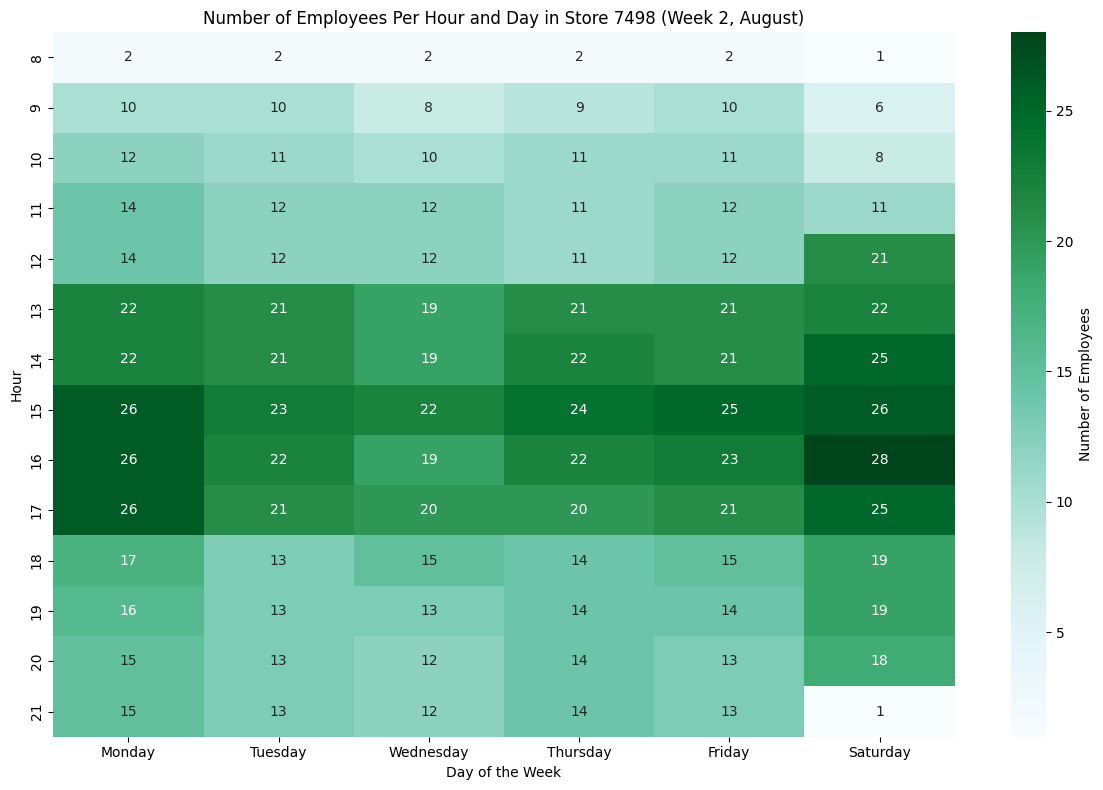

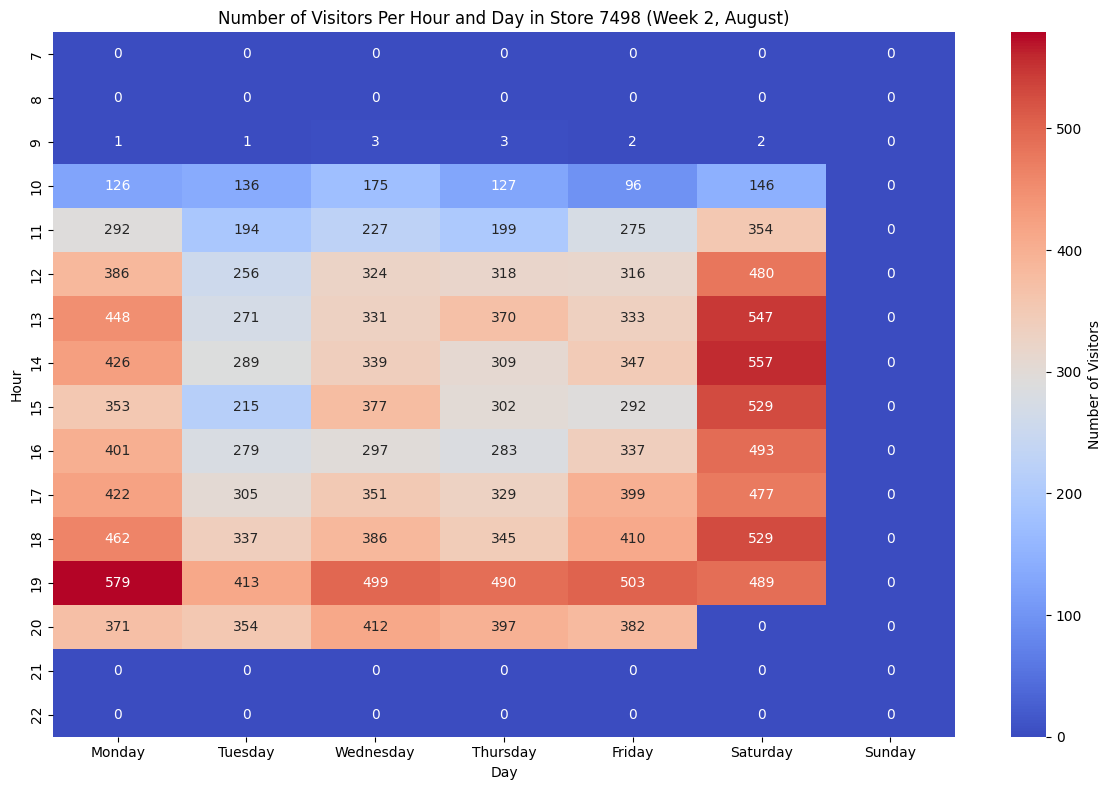

In [173]:
# Heatmap for Store 7498, Month 8, Week 2
store_id = 7498
selected_month = 8
selected_week = 32

# Filter data for store 7498 in the second week of August
visitor_data = visitors_df[(visitors_df['store'] == store_id) & 
                           (visitors_df['date'].dt.month == selected_month) & 
                           (visitors_df['date'].dt.isocalendar().week == selected_week)]

employee_data = schedule_df[(schedule_df['store'] == store_id) & 
                            (schedule_df['date'].dt.month == selected_month) & 
                            (schedule_df['date'].dt.isocalendar().week == selected_week)]

# Process visitor data
visitor_data['hour'] = visitor_data['hour']
visitor_pivot = visitor_data.pivot_table(index='hour', columns='date', values='visitors', aggfunc='sum', fill_value=0)

# Expand employee schedule to calculate employees per hour
expanded_hours = []
for _, row in employee_data.iterrows():
    for hour in range(row['start_datetime'].hour, row['end_datetime'].hour + 1):
        expanded_hours.append({'date': row['date'], 'hour': hour, 'employee_id': row['employee id']})

expanded_df = pd.DataFrame(expanded_hours)
employee_pivot = expanded_df.groupby(['hour', 'date'])['employee_id'].nunique().unstack(fill_value=0)

# Plot heatmap for employees
plt.figure(figsize=(12, 8))
sns.heatmap(employee_pivot, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Number of Employees'}, xticklabels=employee_pivot.columns.strftime('%A'))
plt.title(f'Number of Employees Per Hour and Day in Store {store_id} (Week 2, August)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

# Plot heatmap for visitors
plt.figure(figsize=(12, 8))
sns.heatmap(visitor_pivot, annot=True, fmt='.0f', cmap='coolwarm', cbar_kws={'label': 'Number of Visitors'}, xticklabels=visitor_pivot.columns.strftime('%A'))
plt.title(f'Number of Visitors Per Hour and Day in Store {store_id} (Week 2, August)')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

In [ ]:
print("Employee Pivot Index (Hours):", employee_pivot.index)
print("Employee Pivot Columns (Days):", employee_pivot.columns)

print(employee_pivot.head(10))


Employee Pivot Index (Hours): Index([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype='int64', name='hour')
Employee Pivot Columns (Days): DatetimeIndex(['2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08',
               '2024-08-09', '2024-08-10'],
              dtype='datetime64[ns]', name='date', freq=None)
date  2024-08-05  2024-08-06  2024-08-07  2024-08-08  2024-08-09  2024-08-10
hour                                                                        
8              2           2           2           2           2           1
9             10          10           8           9          10           6
10            12          11          10          11          11           8
11            14          12          12          11          12          11
12            14          12          12          11          12          21
13            22          21          19          21          21          22
14            22          21          19          22    

In [183]:
# Ensure columns in employee_pivot and visitor_pivot are datetime
employee_pivot.columns = pd.to_datetime(employee_pivot.columns)
visitor_pivot.columns = pd.to_datetime(visitor_pivot.columns)

# Optimization
optimized_employee_pivot_01 = employee_pivot.copy()

for hour in visitor_pivot.index:
    for day in visitor_pivot.columns:
        visitors = visitor_pivot.at[hour, day]

        # Retain original values for specific hours
        if hour in [8, 21]:
            if day in employee_pivot.columns:
                employees_01 = employee_pivot.at[hour, day]
            else:
                employees_01 = 0  # Default to 0 if day is not found
        # Low time
        elif visitors < LOW_THRESHOLD:
            employees_01 = max(1, int((visitors / NORMAL_THRESHOLD) * LOW_MULTIPLIER))
        # Peak time
        elif visitors > PEAK_THRESHOLD:
            employees_01 = max(1, int((visitors / NORMAL_THRESHOLD) * PEAK_MULTIPLIER))
        # Normal time
        else:
            employees_01 = max(1, int(visitors / NORMAL_THRESHOLD))

        # Assign employees to the optimized pivot table
        optimized_employee_pivot_01.at[hour, day] = employees_01


C:\Users\User\AppData\Local\Temp\ipykernel_17508\2699575523.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_data_01['hour'] = visitor_data_01['hour']


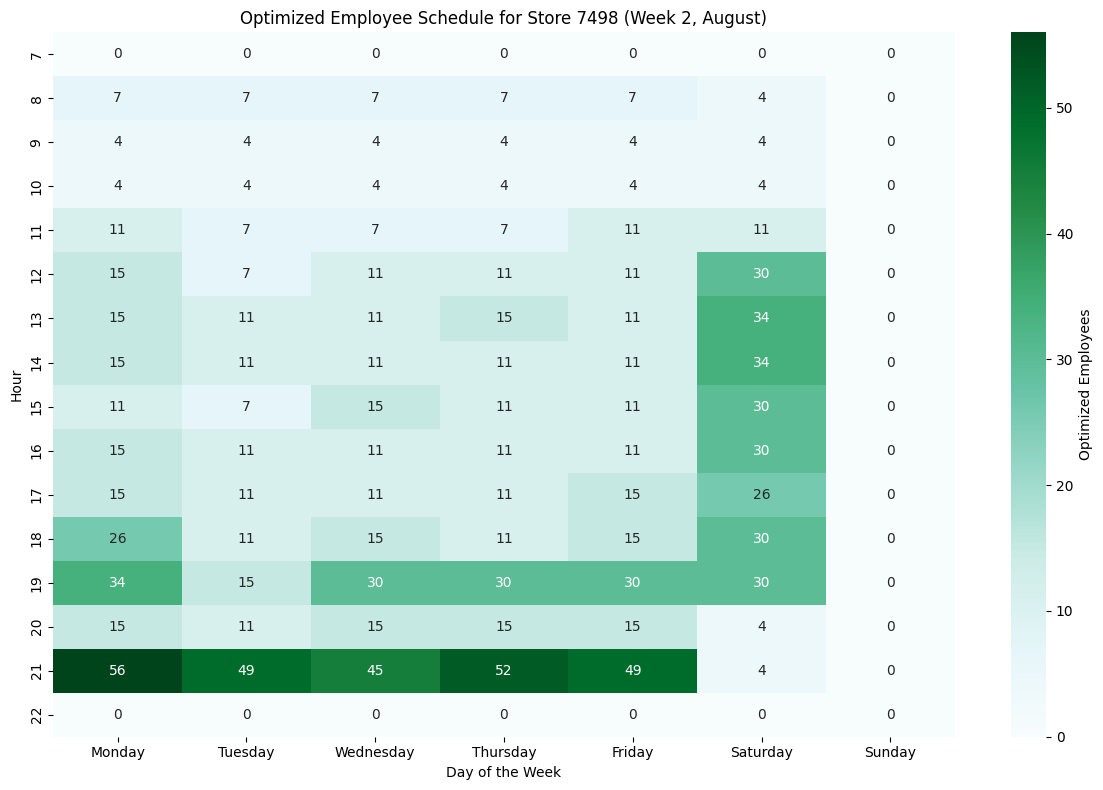


Employee Summary:
Total Employees Before Optimization: 1291
Total Employees After Optimization: 1286


In [202]:
# Define parameters for optimization, NORMAL_THRESHOLD, , PEAK_MULTIPLIER , LOW_MULTIPLIER  -->grammi hour 7 den antigrafete famo to dia
PEAK_THRESHOLD_01 = 450 # Visitor count to consider peak time
LOW_THRESHOLD_01 = 100  # Visitor count to consider low time



# Filter data for store 7498 in the second week of August
visitor_data_01 = visitors_df[(visitors_df['store'] == store_id) & 
                           (visitors_df['date'].dt.month == selected_month) & 
                           (visitors_df['date'].dt.isocalendar().week == selected_week)]

employee_data_01 = schedule_df[(schedule_df['store'] == store_id) & 
                            (schedule_df['date'].dt.month == selected_month) & 
                            (schedule_df['date'].dt.isocalendar().week == selected_week)]

# Process visitor data
visitor_data_01['hour'] = visitor_data_01['hour']
visitor_pivot = visitor_data_01.pivot_table(index='hour', columns='date', values='visitors', aggfunc='sum', fill_value=0)

# Expand employee schedule to calculate employees per hour
expanded_hours = []
for _, row in employee_data_01.iterrows():
    for hour in range(row['start_datetime'].hour, row['end_datetime'].hour + 1):
        expanded_hours.append({'date': row['date'], 'hour': hour, 'employee_id': row['employee id']})

expanded_df_01 = pd.DataFrame(expanded_hours)
employee_pivot = expanded_df_01.groupby(['hour', 'date'])['employee_id'].nunique().unstack(fill_value=0)

# Ensure visitor_pivot and employee_pivot columns are datetime
visitor_pivot.columns = pd.to_datetime(visitor_pivot.columns)
employee_pivot.columns = pd.to_datetime(employee_pivot.columns)

# Optimization
optimized_employee_pivot_01 = employee_pivot.copy()

for hour in visitor_pivot.index:
    for day in visitor_pivot.columns:
        visitors = visitor_pivot.at[hour, day]

      # Retain original values for specific hours
        if hour in [8, 21]:
                employees_01 = employee_pivot.at[hour, day] if day in employee_pivot.columns else 0 # Retain the exact number from the original employee_pivot
        # Set hours 7 and 22 to 0
        elif hour in [7, 22]:
            employees_01 = 0
        # Set all hours for Sunday to 0
        elif day.weekday() == 6:  # Sunday is 6 in Python's weekday()
            employees_01 = 0
        # Low time
        elif visitors < LOW_THRESHOLD_01:
            employees_01 = max(1, int((visitors / NORMAL_THRESHOLD) * LOW_MULTIPLIER))
        # Peak time
        elif visitors > PEAK_THRESHOLD_01:
            employees_01 = max(1, int((visitors / NORMAL_THRESHOLD) * PEAK_MULTIPLIER))
        # Normal time
        else:
            employees_01 = max(1, int(visitors / NORMAL_THRESHOLD))

        # Assign employees_01 to the optimized pivot table
        optimized_employee_pivot_01.at[hour, day] = employees_01

# Dynamically scale the optimized heatmap to match total employees
current_total_employees = optimized_employee_pivot_01.sum().sum()
target_total_employees = employee_pivot.sum().sum()  # Match the original total employees
scale_factor = target_total_employees / current_total_employees
optimized_employee_pivot_01 *= scale_factor
optimized_employee_pivot_01 = optimized_employee_pivot_01.round()

# Sort the index (hour) for proper order
optimized_employee_pivot_01 = optimized_employee_pivot_01.sort_index(ascending=True)

# Plot optimized employee heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(optimized_employee_pivot_01, annot=True, fmt='.0f', cmap='BuGn', cbar_kws={'label': 'Optimized Employees'}, xticklabels=optimized_employee_pivot_01.columns.strftime('%A'))
plt.title(f'Optimized Employee Schedule for Store {store_id} (Week 2, August)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

# Print total employees before and after optimization
print("\nEmployee Summary:")
print(f"Total Employees Before Optimization: {employee_pivot.sum().sum():.0f}")
print(f"Total Employees After Optimization: {optimized_employee_pivot_01.sum().sum():.0f}")
